# Business analytics / Data Analysis 

## Introduction

In [173]:
import numpy as np
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
# some params to set
%matplotlib inline 

plt.rcParams['figure.figsize'] = [32, 16]
np.random.seed(1234)

Load the data in a dataframe.

In [175]:
df = pd.read_excel("data\\Centris_Final_Dataset_Clean.xlsx")

Check the shape of the dataframe: (rows, columns). Originally, there was ~9060 observations but I dropped some while cleaning.

In [176]:
print(df.shape)

(8717, 36)


### Selection

Nous voulons maintenant exclure les proprietes ne correspondant pas a nos criteres:

- Le prix du pied/carre doit etre inferieur a 5\$;
- Le prix du peid/carre doit etre superieur a 0\$ (vendeurs au p/c qui n'entrent pas de superficie);
- Superficie doit etre approximativement >= 1 acre (>40,000 p/c);
- Prix total doit etre inferieur a 149,000;
- Pris plus grand que 6000 car ceux qui sont inferieur sont en realite des erreurs de donnees;
- Le terrain doit se trouver a moins de 2.1 heures de la residence;

In [177]:
df = df[(df.Duration_H <= 2.1) & ((df.Prix_PC <= 5) & (df.Prix_PC >= 0.01)) & (df.Superficie >= 40000) & ((df.Prix >= 6000) & (df.Prix <= 149000))]

Ce qui nous fait passer de 8717 terrains a 2155. On remarque la meme tendance qu'enonce plus tot.

In [178]:
print(df.shape)

(2118, 36)


Check the size of the dataframe. Size is the number of 'cells' or rows X columns.

In [179]:
print(df.size)

76248


Check the number of dimensions. Return 1 if Series. Otherwise return 2 if DataFrame.

In [180]:
print(df.ndim)

2


Check the data types of the variables.

In [181]:
print(df.dtypes)

Superficie                      int64
Prix                            int64
Ville                          object
Lien                           object
Polldate               datetime64[ns]
Prix_PC                       float64
Adresse                        object
Centris                         int64
Description                    object
Z_Agricole                       bool
Z_Autre                          bool
Z_Commercial                     bool
Z_Forestier                      bool
Z_Industriel                     bool
Z_Recreotouristique              bool
Z_Residentiel                    bool
Z_Villegiature                   bool
Code_Postal                    object
Ville_Detail                   object
Water_front                      bool
Water_access                     bool
Water_plan                       bool
formatted_address              object
latitude                      float64
longitude                     float64
coord_type                     object
gmap_id     

Now, check the data itself:

In [182]:
df.head()

,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
1,291214,58000,Saint-Colomban,https://www.centris.ca/fr/terrain~a-vendre~sai...,2020-01-11,0.20,"Côte Saint-Patrick, Saint-Colomban, J5K 1T1",24586948,"Superbe opportunité, votre propre domaine! Ter...",False,...,ChIJR_-SFVkoz0wRKNwEyVuBRig,postal_code,Saint-Colomban,Saint-Colomban,La Rivière-du-Nord Regional County Municipality,"Saint-Colomban, QC J5K 1T1","65,561.00","3,352.00",65.56,0.93
2,762300,35000,La Macaza,https://www.centris.ca/fr/terrain~a-vendre~la-...,2020-01-11,0.05,"Chemin des Cascades, La Macaza, J0T 1R0",25295553,Très beau terrain de 17 ACRES! prêt à construi...,False,...,ChIJmylGT5GHz0wRV7qKtv2YvUc,"administrative_area_level_3,political",La Macaza,La Macaza,Antoine-Labelle Regional County Municipality,"La Macaza, QC J0T 1R0","168,002.00","7,173.00",168.00,1.99
4,49320,39500,Saint-Damien,https://www.centris.ca/fr/terrain~a-vendre~sai...,2020-01-11,0.80,"Chemin Beaulieu, Saint-Damien, J0K 2E0",11705910,"Directement en bordure du Lac Quesnel, terrain...",False,...,ChIJ_d6yiI8ExkwRIrrqmCKQcVE,"locality,political",Saint-Damien,Saint-Damien,Matawinie Regional County Municipality,"Saint-Damien, QC J0K 2E0","111,420.00","4,864.00",111.42,1.35
7,43731,34999,L'Ange-Gardien,https://www.centris.ca/fr/terrain~a-vendre~l-a...,2020-01-11,0.80,"Chemin Gauthier, L'Ange-Gardien (Outaouais), J...",26905299,"Terrain boisé de 43730,9 pieds carrés situé à ...",False,...,ChIJC0bWIHowzkwRGzaRhmnJg7M,postal_code,NaN,L'Ange-Gardien,NaN,"L'Ange-Gardien, QC J8L 2W9","177,785.00","7,106.00",177.78,1.97
10,153396,129000,Saint-Alban,https://www.centris.ca/fr/terrain~a-vendre~sai...,2020-01-11,0.84,"Chemin du Lac-Clair, Saint-Alban, G0A 3B0",12775958,Deux terrains (151 265 p.c. et 2131 p.c.) dont...,False,...,ChIJc0ujG5QMx0wR_8u5Ie3tBDw,"locality,political",Saint-Alban,Saint-Alban,Portneuf Regional County Municipality,"Saint-Alban, QC G0A 3B0","196,602.00","7,518.00",196.60,2.09


### Data description

Descriptions des variables du dataset:

| Variable | Description | Usage | Source | Notes |
| :------- | :---------- | :---- | :----- | :---- |
| Superficie | Taille du terrain a vendre en pied/carre |  | Centris Listing | |
| Prix | Prix du terrain en dollars canadien | | Centris Listing | Les obs. ou le prix etaient null furent supprimees |
| Ville | Ville ou le terrain est situe |  | Centris Listing ||
| Lien | Hyperlien pour acceder au detail (Fiche sommaire) | | Centris Listing ||
| Polldate | Date ou le script a extrait l'information || Python: datetime.today() ||
| Prix_PC | Prix au pied/carre pour comparaison | | Calcul: Prix/Superficie ||
| Adresse | Adresse de la propriete a vendre | | Centris Fiche Individuelle | |
| Centris| No Centris de la fiche | | Centris Fiche Individuelle | |
| Description | Description de la propriete par le vendeur | | Centris Fiche Individuelle | |
| Z_Agricole | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Autre  | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Commercial | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Forestier  | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Industriel  | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Recreotouristique | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Residentiel   | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Villegiature | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Code_Postal | Code postal extrait de l'adresse | | Centris Fiche Individuelle | |
| Ville_Detail | Detail extrait de l'adresse. Ce qui est entre parenthese. | | Centris Fiche Individuelle | |
| Water_front | Variable indicatrice creer a partir de 'Carac. additionnelles' || Centris Fiche Individuelle ||
| Water_access | Variable indicatrice creer a partir de 'Carac. additionnelles' || Centris Fiche Individuelle ||
| Water_plan  | Variable indicatrice creer a partir de 'Carac. additionnelles' || Centris Fiche Individuelle ||
| formatted_address | Adresse retournee par Gmap API | Pour fin de validation | Gmap Distance Matrix API | |
| latitude  | Latitude |  | Gmap Geolocalisation API | |
| longitude  | Longitude |  | Gmap Geolocalisation API | |
| coord_type   | Type de lieu | Pour fin de validation | Gmap Geolocalisation API | |
| gmap_id | Id du lieu | Pour fin de validation | Gmap Geolocalisation API | |
| gmap_type | Type de lieu que Google a compris | Pour fin de validation | Gmap Geolocalisation API | |
| quartier | administrative_area_level_3 |  | Gmap Geolocalisation API | |
| ville  | locality |  | Gmap Geolocalisation API | Lorsque 'ville' n'avait aucun retour, j'ai impute 'quartier'|
| region| administrative_area_level_2 |  | Gmap Geolocalisation API | |
| destination | destination_addresses | Pour fin de validation | Gmap Distance Matrix API | |
| Distance | Distance en metres de ma residence | | Gmap Distance Matrix API | | 
| Duration  | Temps en secondes de ma residence | | Gmap Distance Matrix API | | 
| Distance_KM | Distance en kilimetres de ma residence | | Calcul: Distance/1000 | | 
| Duration_H | Temps en heures de ma residence | | Calcul: Duration/3600 | | 

'Centris Listing' : https://www.centris.ca/fr/terrain~a-vendre?view=List

Statistiques descriptives de chacune des variables quantitatives.

In [183]:
# remove scientific notation
pd.options.display.float_format = '{:,.2f}'.format

df.describe()

,Superficie,Prix,Prix_PC,Centris,latitude,longitude,Distance,Duration,Distance_KM,Duration_H
count,"2,118.00","2,118.00","2,118.00","2,118.00","2,118.00","2,118.00","2,118.00","2,118.00","2,118.00","2,118.00"
mean,"176,780.88","64,555.53",0.80,"18,997,102.44",45.92,-73.87,"113,023.29","4,977.77",113.02,1.38
std,"469,414.93","33,169.28",0.56,"5,719,590.24",0.38,0.90,"33,659.91","1,207.83",33.66,0.34
min,"40,000.00","7,000.00",0.02,"8,256,992.00",45.01,-75.67,"34,853.00","2,125.00",34.85,0.59
25%,"51,566.25","39,000.00",0.40,"14,039,941.75",45.73,-74.39,"84,383.00","3,858.00",84.38,1.07
50%,"71,379.00","59,500.00",0.68,"18,903,339.00",45.95,-74.12,"110,317.00","4,864.00",110.32,1.35
75%,"116,747.50","85,000.00",1.08,"23,827,229.75",46.16,-73.35,"135,926.50","5,814.00",135.93,1.61
max,"6,229,080.00","149,000.00",3.45,"28,991,936.00",46.81,-71.63,"203,923.00","7,548.00",203.92,2.10


In [184]:
df.nlargest(3,'Superficie')

,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
3048,6229080,129900,Saint-Émile-de-Suffolk,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.02,"Chemin de la Montagne, Saint-Émile-de-Suffolk,...",19155599,"Superbe terre de 143 acres, à 30 min de Trembl...",False,...,ChIJ8zu9g1Guz0wRq9CWGCofhX8,"locality,political",Saint-Émile-de-Suffolk,Saint-Émile-de-Suffolk,Papineau,"Saint-Émile-de-Suffolk, QC J0V 1Y0","155,890.00","6,272.00",155.89,1.74
3619,6011280,146000,Rivière-Rouge,https://www.centris.ca/fr/terre~a-vendre~rivie...,2020-01-11,0.02,"Chemin Laliberté, Rivière-Rouge, Quartier Marc...",26677058,À moins de 2 heures de Montréal et d'Ottawa. M...,False,...,ChIJ0aE2E6hixUwRnO84bafC8E8,postal_code,NaN,Rivière-Rouge,Antoine-Labelle Regional County Municipality,"Rivière-Rouge, QC J0T 1T0","170,887.00","6,981.00",170.89,1.94
8298,5837040,114500,Chénéville,https://www.centris.ca/fr/terrain~a-vendre~che...,2020-01-11,0.02,"Montée du 7e Rang, Chénéville, J0V 1E0",10303919,Wow splendide terre de 134 Acres directement s...,False,...,ChIJgWwIzKizz0wRd8jNr0Omh5U,"locality,political",Chénéville,Chénéville,Papineau,"Chénéville, QC J0V 1E0","156,491.00","6,426.00",156.49,1.78


## Histogramme des prix au pied/carre

Text(0.5, 1.0, 'Histograme des Prix au P/C')

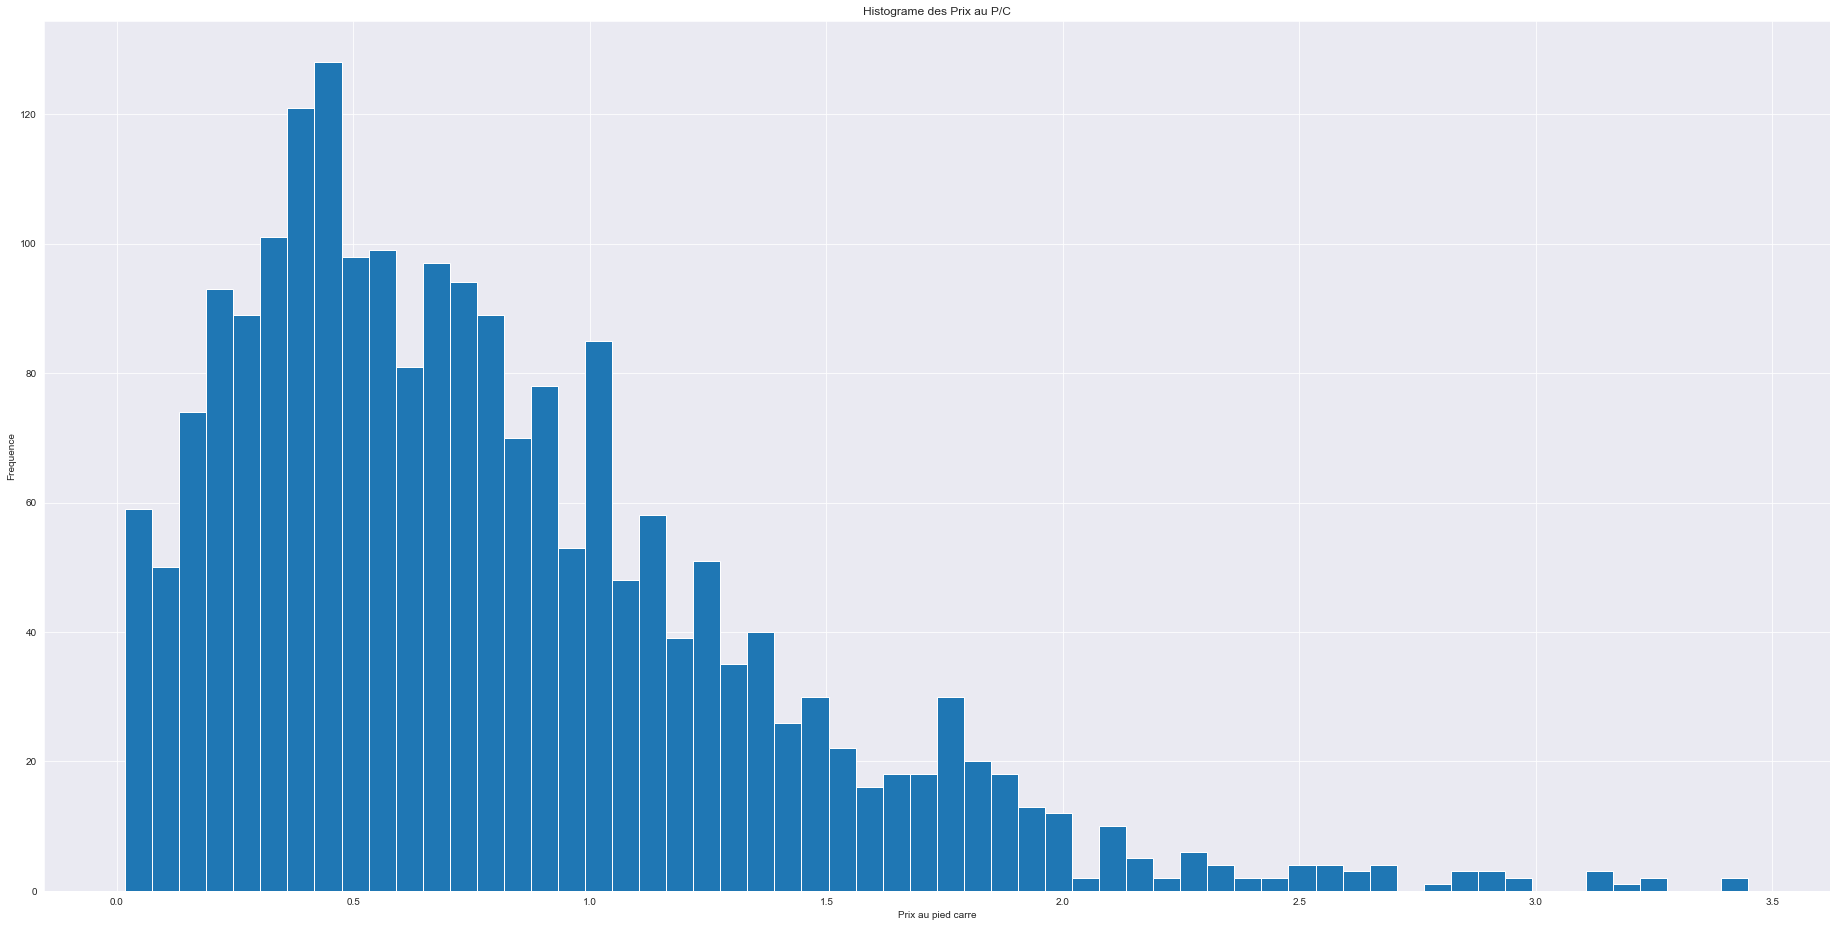

In [185]:
df.Prix_PC.hist(bins=60)
plt.xlabel('Prix au pied carre') 
plt.ylabel('Frequence')
plt.title("Histograme des Prix au P/C")

## Fonction de densite de probabilite pour Prix au pied carre

Text(0.5, 1.0, 'variable aléatoire à densité du prix au pied/carre')

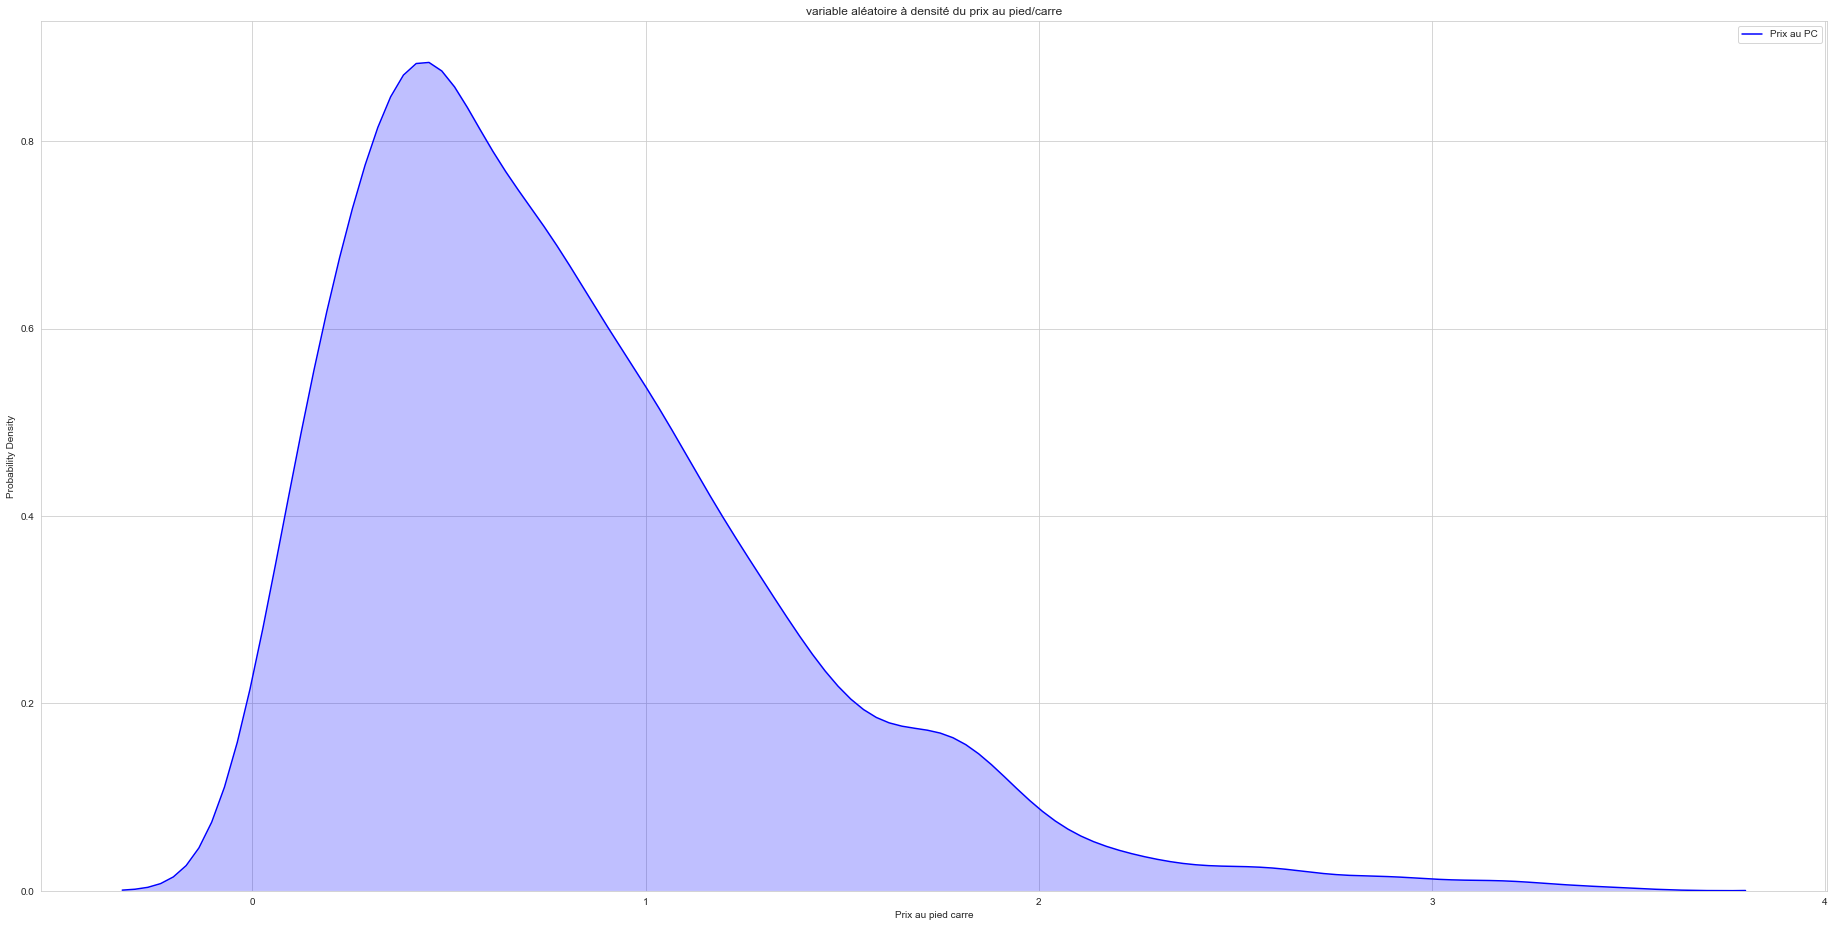

In [186]:
sns.set_style("whitegrid")
sns.kdeplot(df[df.Prix_PC <= 5].Prix_PC, color='b', shade=True, Label='Prix au PC') 

# Setting the X and Y Label 
plt.xlabel('Prix au pied carre') 
plt.ylabel('Probability Density')
plt.title("variable aléatoire à densité du prix au pied/carre")

### Prix au pied/carre versus distance de Montreal

Pour les terrains situes **a moins d'une heure de Montreal**, la tendance semble etre autour de 1\$/pc avec un biais vers la droite. Pour les terrains situes **a plus d'une heure de Montreal**, la tendance est plutot de 0.5\$/pc avec un biais vers la droite.

Les courbes de densites ci-dessous demontrent le phenomene.

Text(0.5, 1.0, 'variable aléatoire à densité du prix au pied/carre')

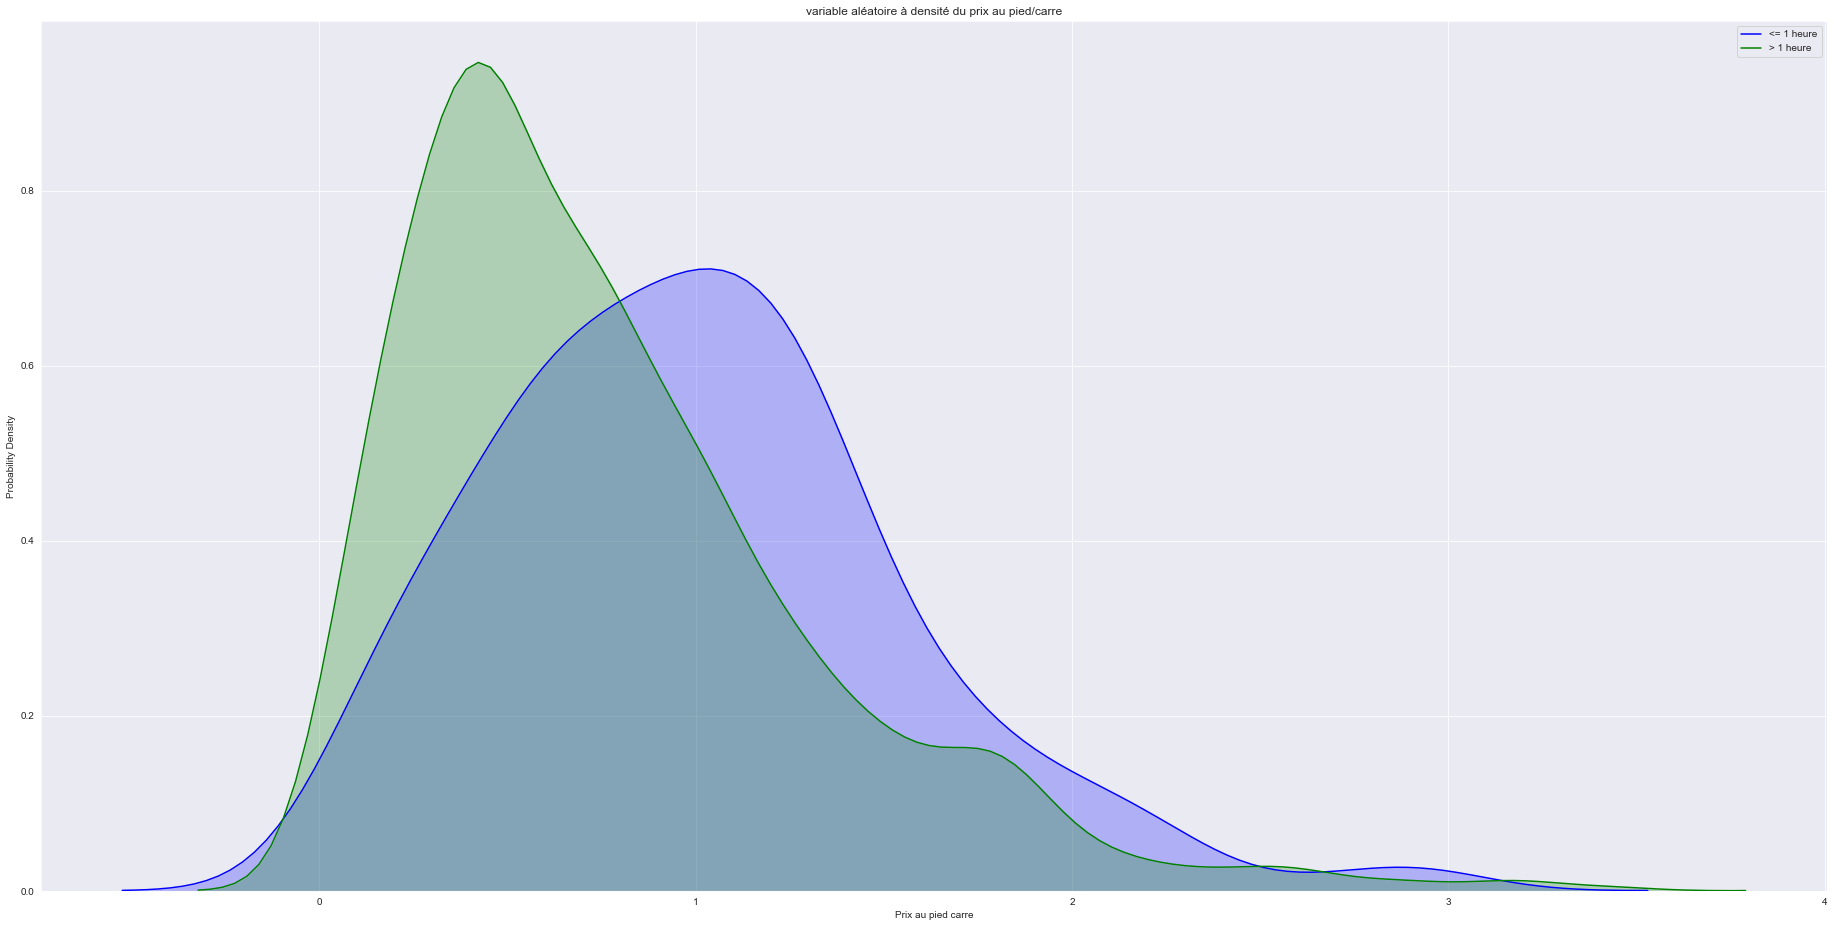

In [187]:
sns.set_style("darkgrid")

sns.kdeplot(df[(df.Prix_PC <= 5) & (df.Duration_H <= 1)].Prix_PC, color='b', shade=True, Label='<= 1 heure') 
sns.kdeplot(df[(df.Prix_PC <= 5) & (df.Duration_H > 1)].Prix_PC, color='g', shade=True, Label='> 1 heure') 

# Setting the X and Y Label 
plt.xlabel('Prix au pied carre') 
plt.ylabel('Probability Density')
plt.title("variable aléatoire à densité du prix au pied/carre")


### Tendance 'Acces a l'eau'

Il semble qu'un acces a l'eau fait diminuer le prix moyen du p/c. L'effet est tres faible somme toute. Ceci pourrait aussi etre fonction de la distance (plus d'acces a l'eau plus loin de Montreal)

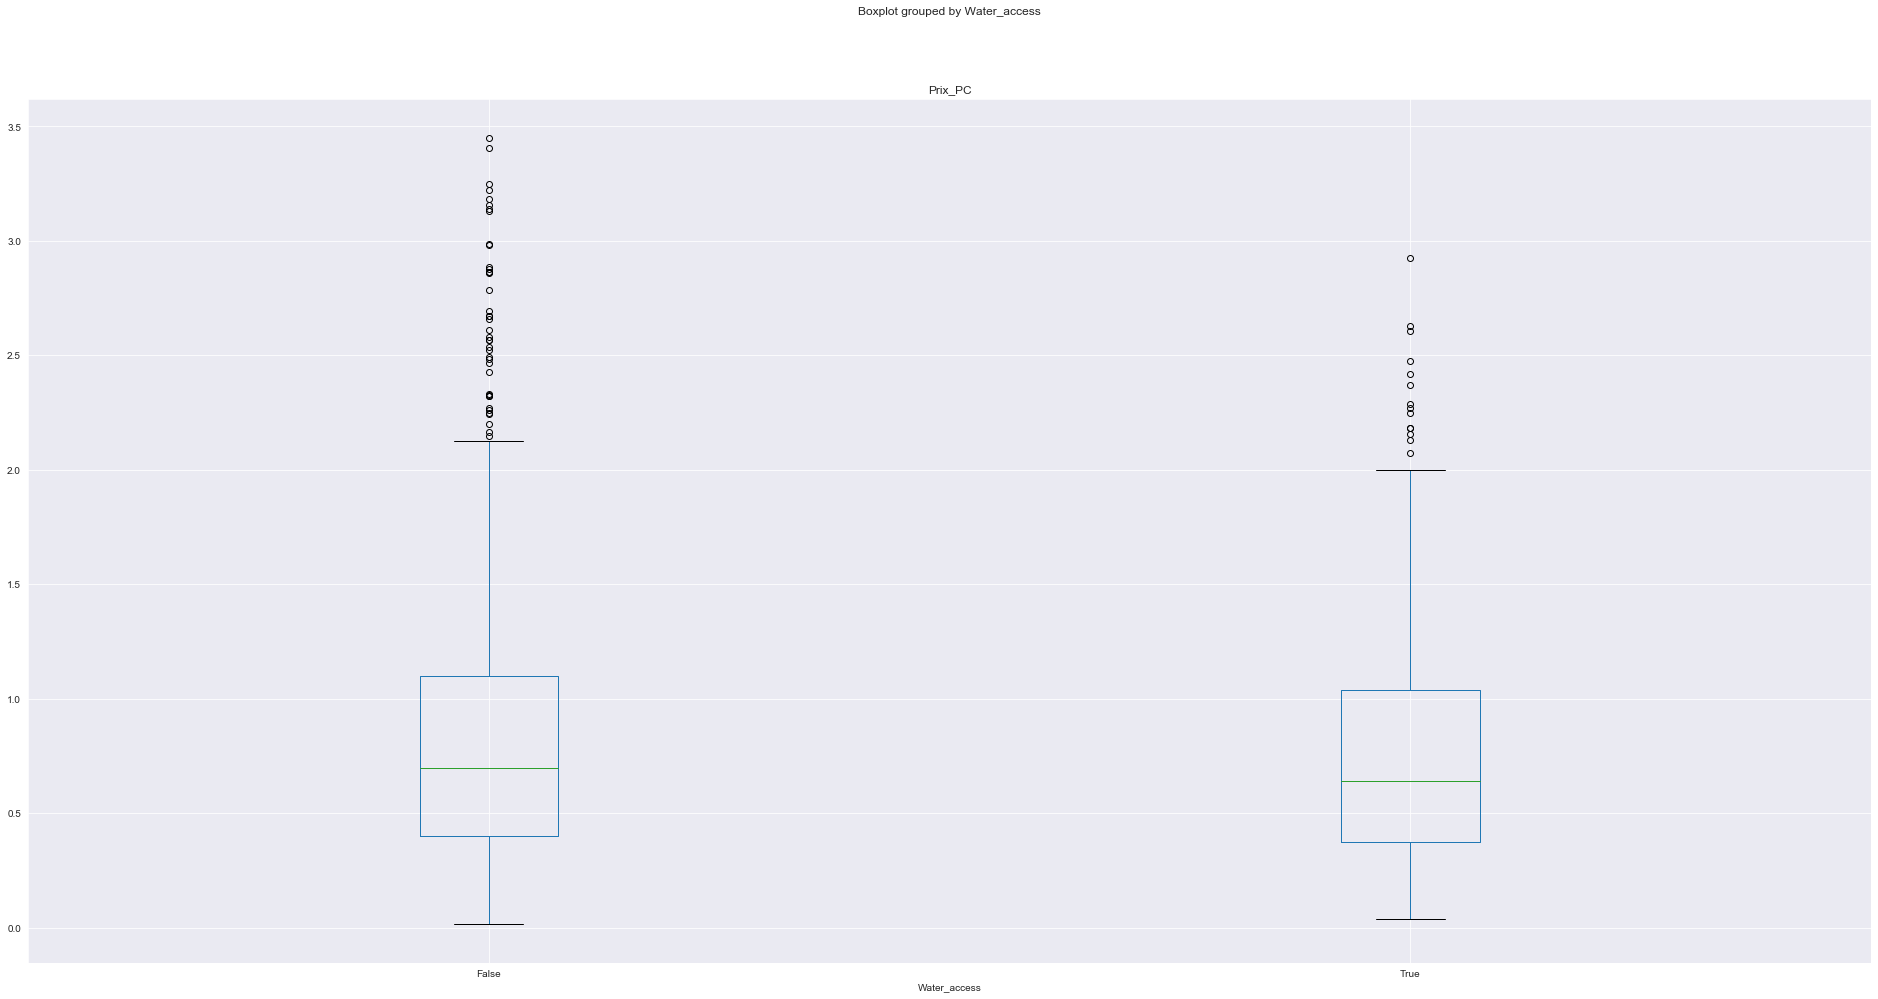

In [188]:
df.boxplot(column=['Prix_PC'], by='Water_access')

Une seconde validation en retirant les items ou le prix au pc est superieur a 3 reduit encore plus la difference. Mais les terrains avec acces a l'eau gardent une tendance a etre moins chers.

Text(0.5, 1.0, 'variable aléatoire à densité du prix au pied/carre')

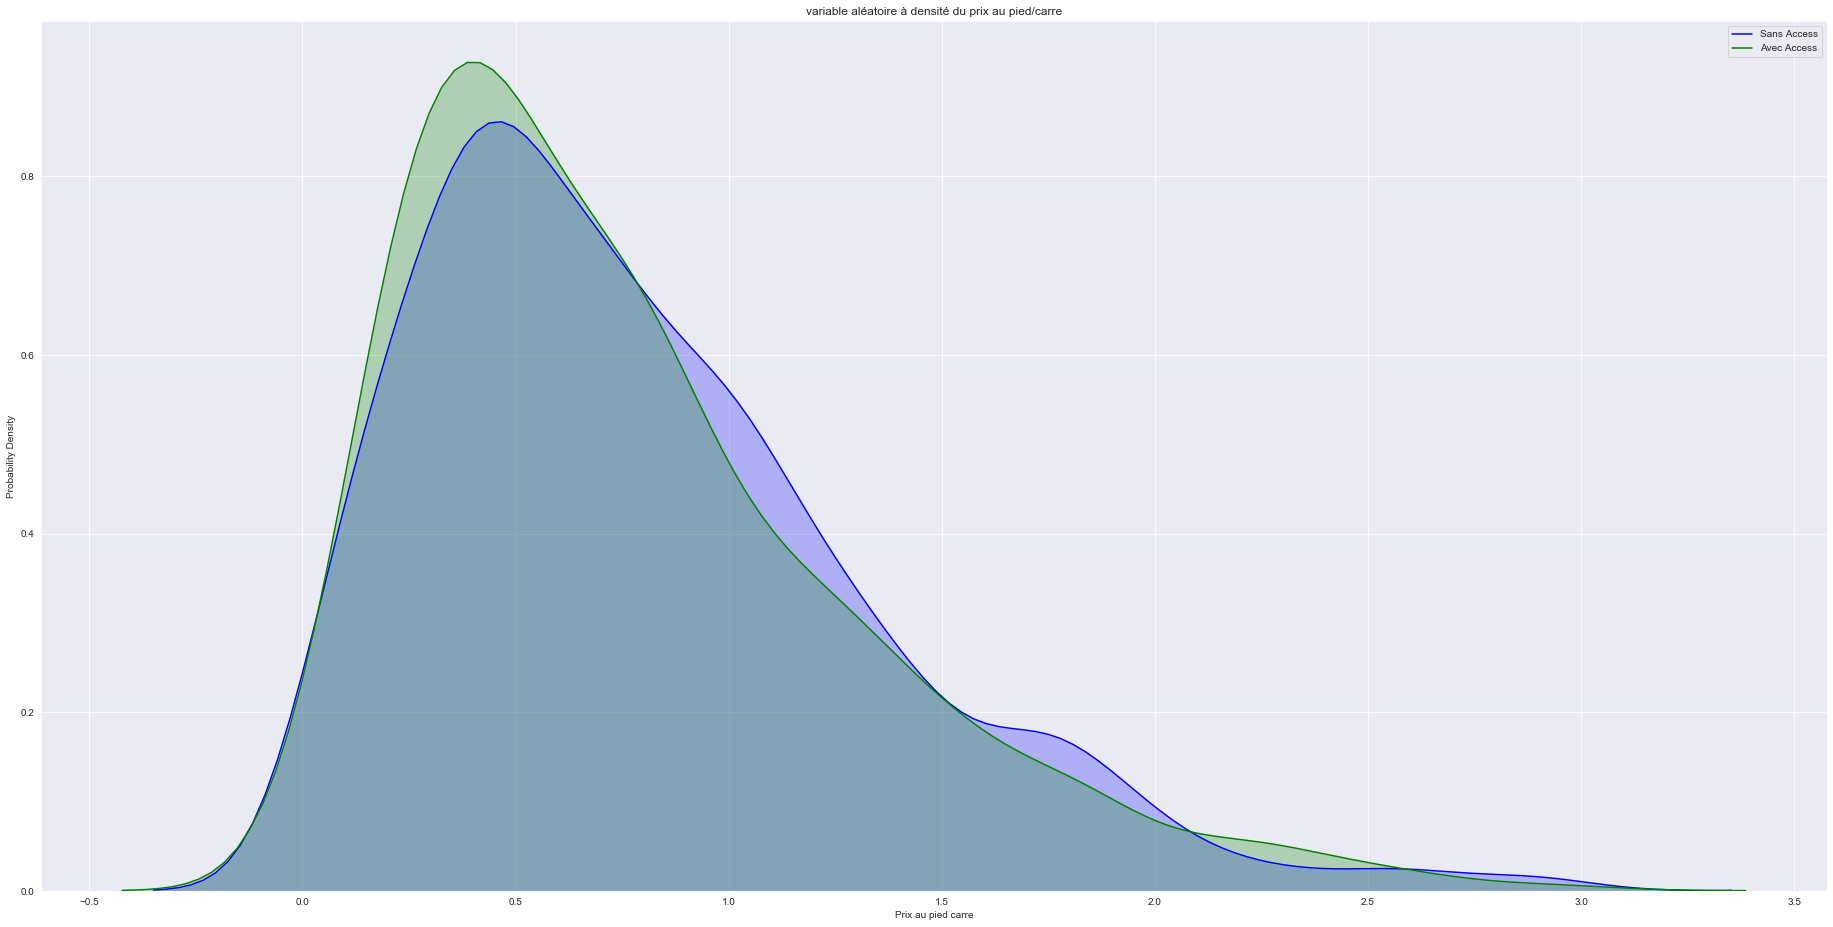

In [189]:
sns.set_style("darkgrid")

sns.kdeplot(df[(df.Water_access == 0) & (df.Prix_PC <= 3)].Prix_PC, color='b', shade=True, Label='Sans Access') 
sns.kdeplot(df[(df.Water_access == 1) & (df.Prix_PC <= 3)].Prix_PC, color='g', shade=True, Label='Avec Access') 

# Setting the X and Y Label 
plt.xlabel('Prix au pied carre') 
plt.ylabel('Probability Density')
plt.title("variable aléatoire à densité du prix au pied/carre")

## Bord de l'eau

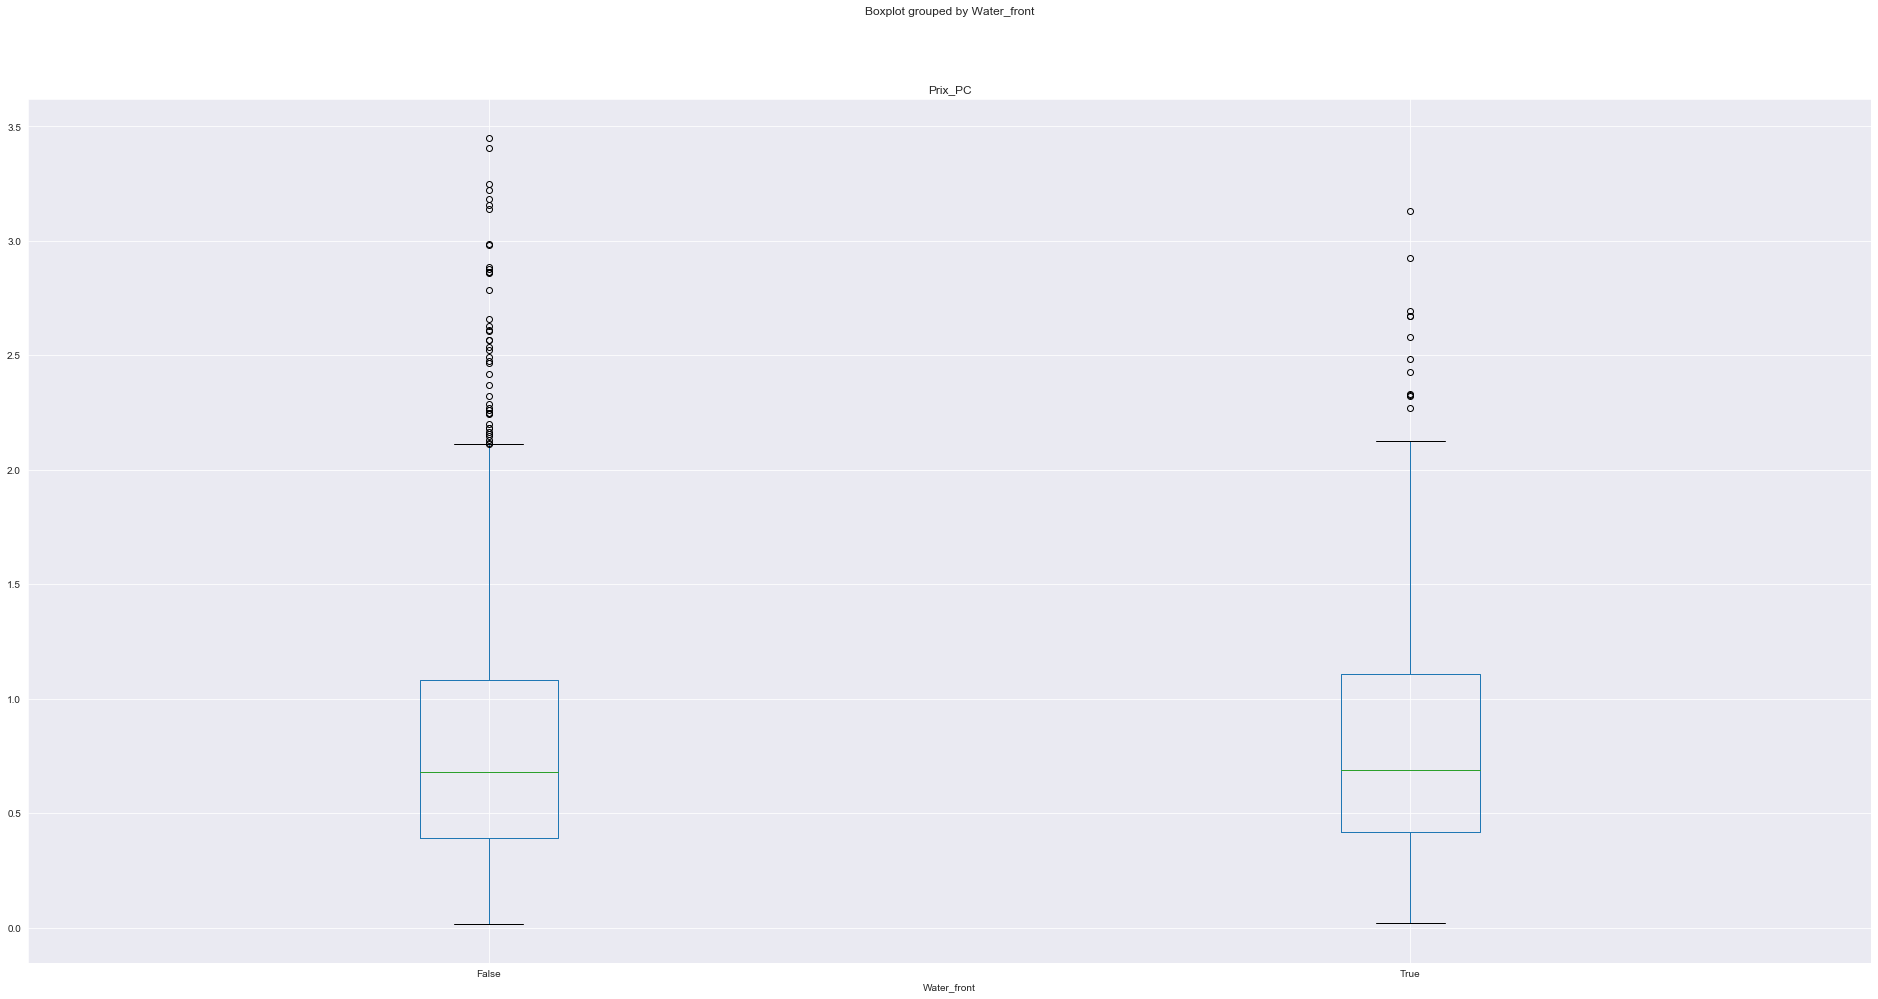

In [190]:
df.boxplot(column=['Prix_PC'], by='Water_front')

## Prix par region

Il y a des differences par region qu'il faudra investiguer. Il faudra faire attention au nombre d'individu par regions et probablement en reduire le nombre autour de 30-40.

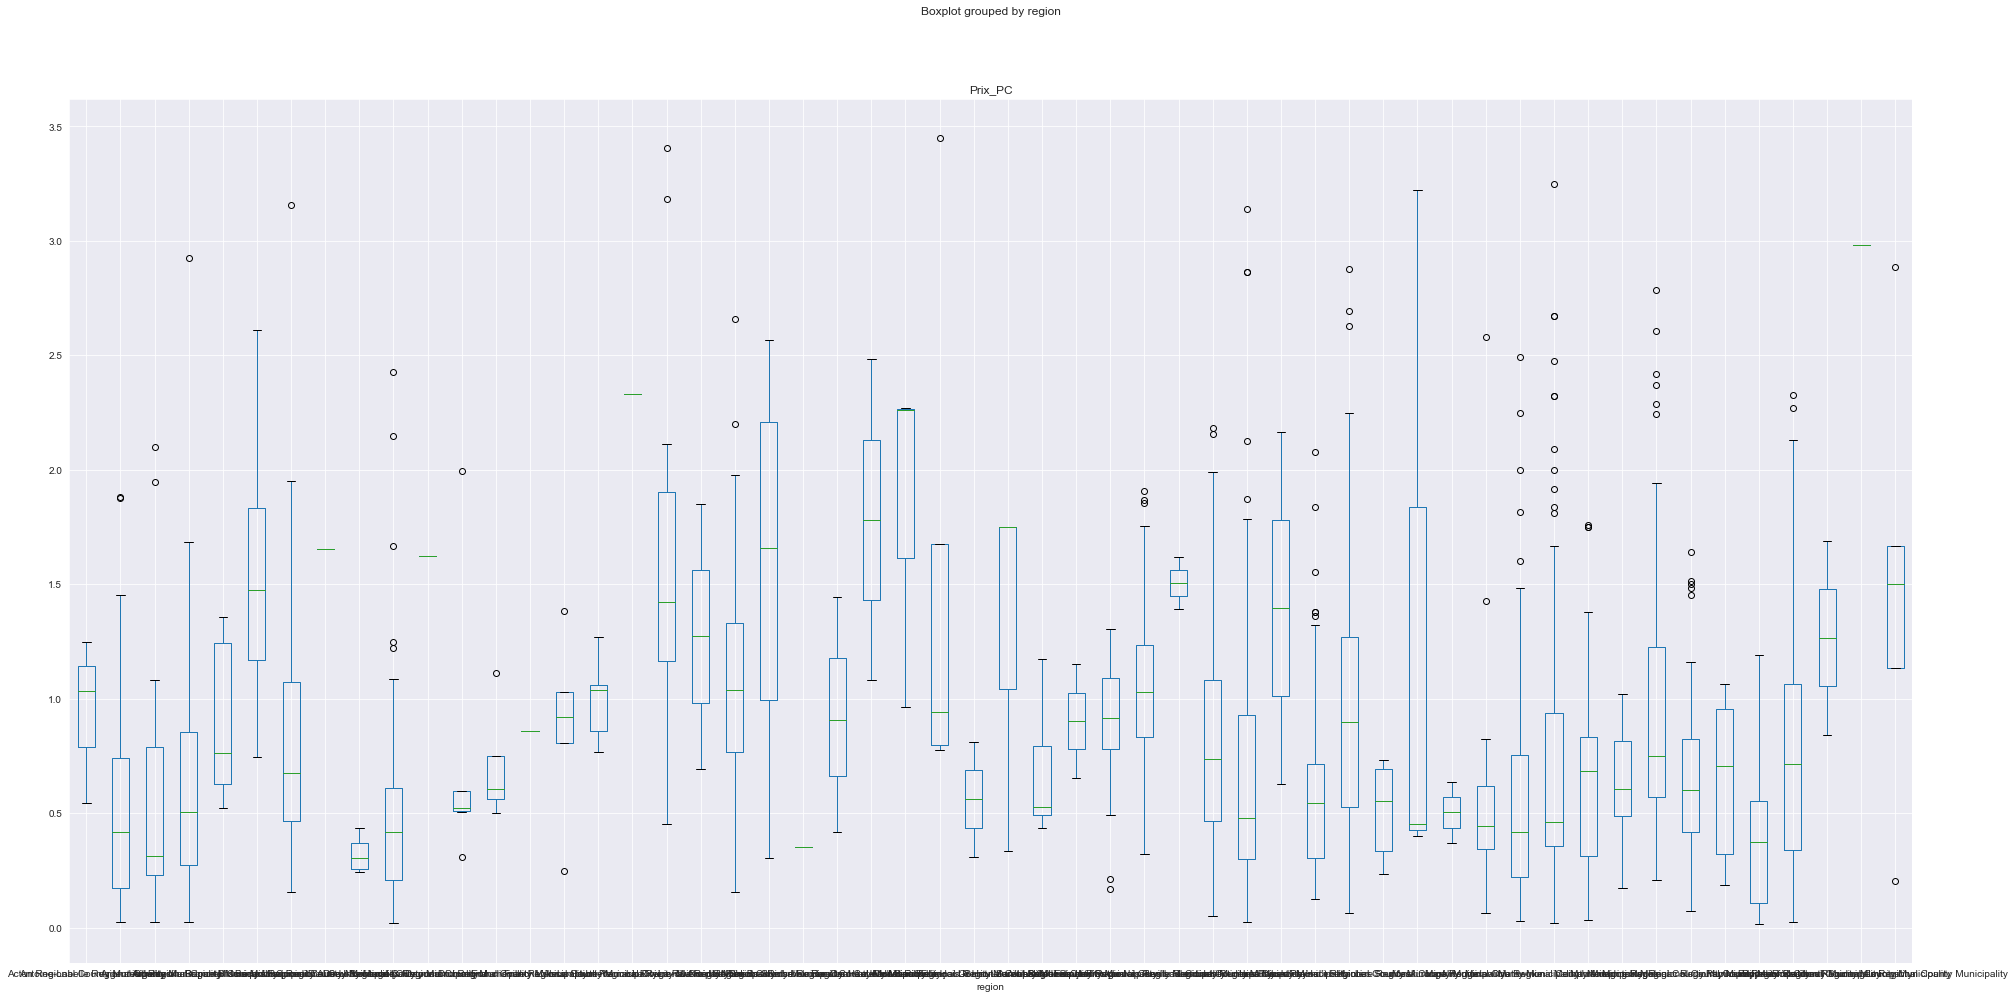

In [191]:
df.boxplot(column=['Prix_PC'], by='region')

Cette visualisation n'est pas optimale. Je dois retirer les categories ayant le moins de membres.

In [192]:
print(len(df.region.unique()))

55


In [193]:
df.region.value_counts()

Matawinie Regional County Municipality                      197
Memphrémagog Regional County Municipality                   186
Les Laurentides                                             166
Les Laurentides Regional County Municipality                153
Les Pays-d'en-Haut Regional County Municipality             148
Argenteuil Regional County Municipality                     135
La Rivière-du-Nord Regional County Municipality              91
Antoine-Labelle Regional County Municipality                 87
Les Collines-de-l'Outaouais Regional County Municipality     81
Matawinie                                                    78
Les Pays-d'en-Haut                                           66
Maskinongé Regional County Municipality                      58
Montcalm Regional County Municipality                        55
Papineau Regional County Municipality                        51
D'Autray Regional County Municipality                        47
La Haute-Yamaska Regional County Municip

Je vais retirer les categories ayant 3 membres et moins. Statistiquement, les resultats pour les categories ayant moins de 10 membres ne sont pas significative mais dans notre cas ca n'est pas grave.

[Text(0, 0, 'La Rivière-du-Nord Regional County Municipality'),
 Text(0, 0, 'Antoine-Labelle Regional County Municipality'),
 Text(0, 0, 'Matawinie Regional County Municipality'),
 Text(0, 0, "Les Pays-d'en-Haut Regional County Municipality"),
 Text(0, 0, 'Montcalm Regional County Municipality'),
 Text(0, 0, 'Argenteuil Regional County Municipality'),
 Text(0, 0, 'Matawinie'),
 Text(0, 0, 'Memphrémagog'),
 Text(0, 0, 'Les Laurentides'),
 Text(0, 0, 'Le Val-Saint-François Regional County Municipality'),
 Text(0, 0, "Les Collines-de-l'Outaouais Regional County Municipality"),
 Text(0, 0, 'Papineau Regional County Municipality'),
 Text(0, 0, 'Les Laurentides Regional County Municipality'),
 Text(0, 0, 'Memphrémagog Regional County Municipality'),
 Text(0, 0, 'Maskinongé Regional County Municipality'),
 Text(0, 0, 'La Haute-Yamaska Regional County Municipality'),
 Text(0, 0, "D'Autray Regional County Municipality"),
 Text(0, 0, 'Mauricie'),
 Text(0, 0, "Les Pays-d'en-Haut"),
 Text(0, 0, 'B

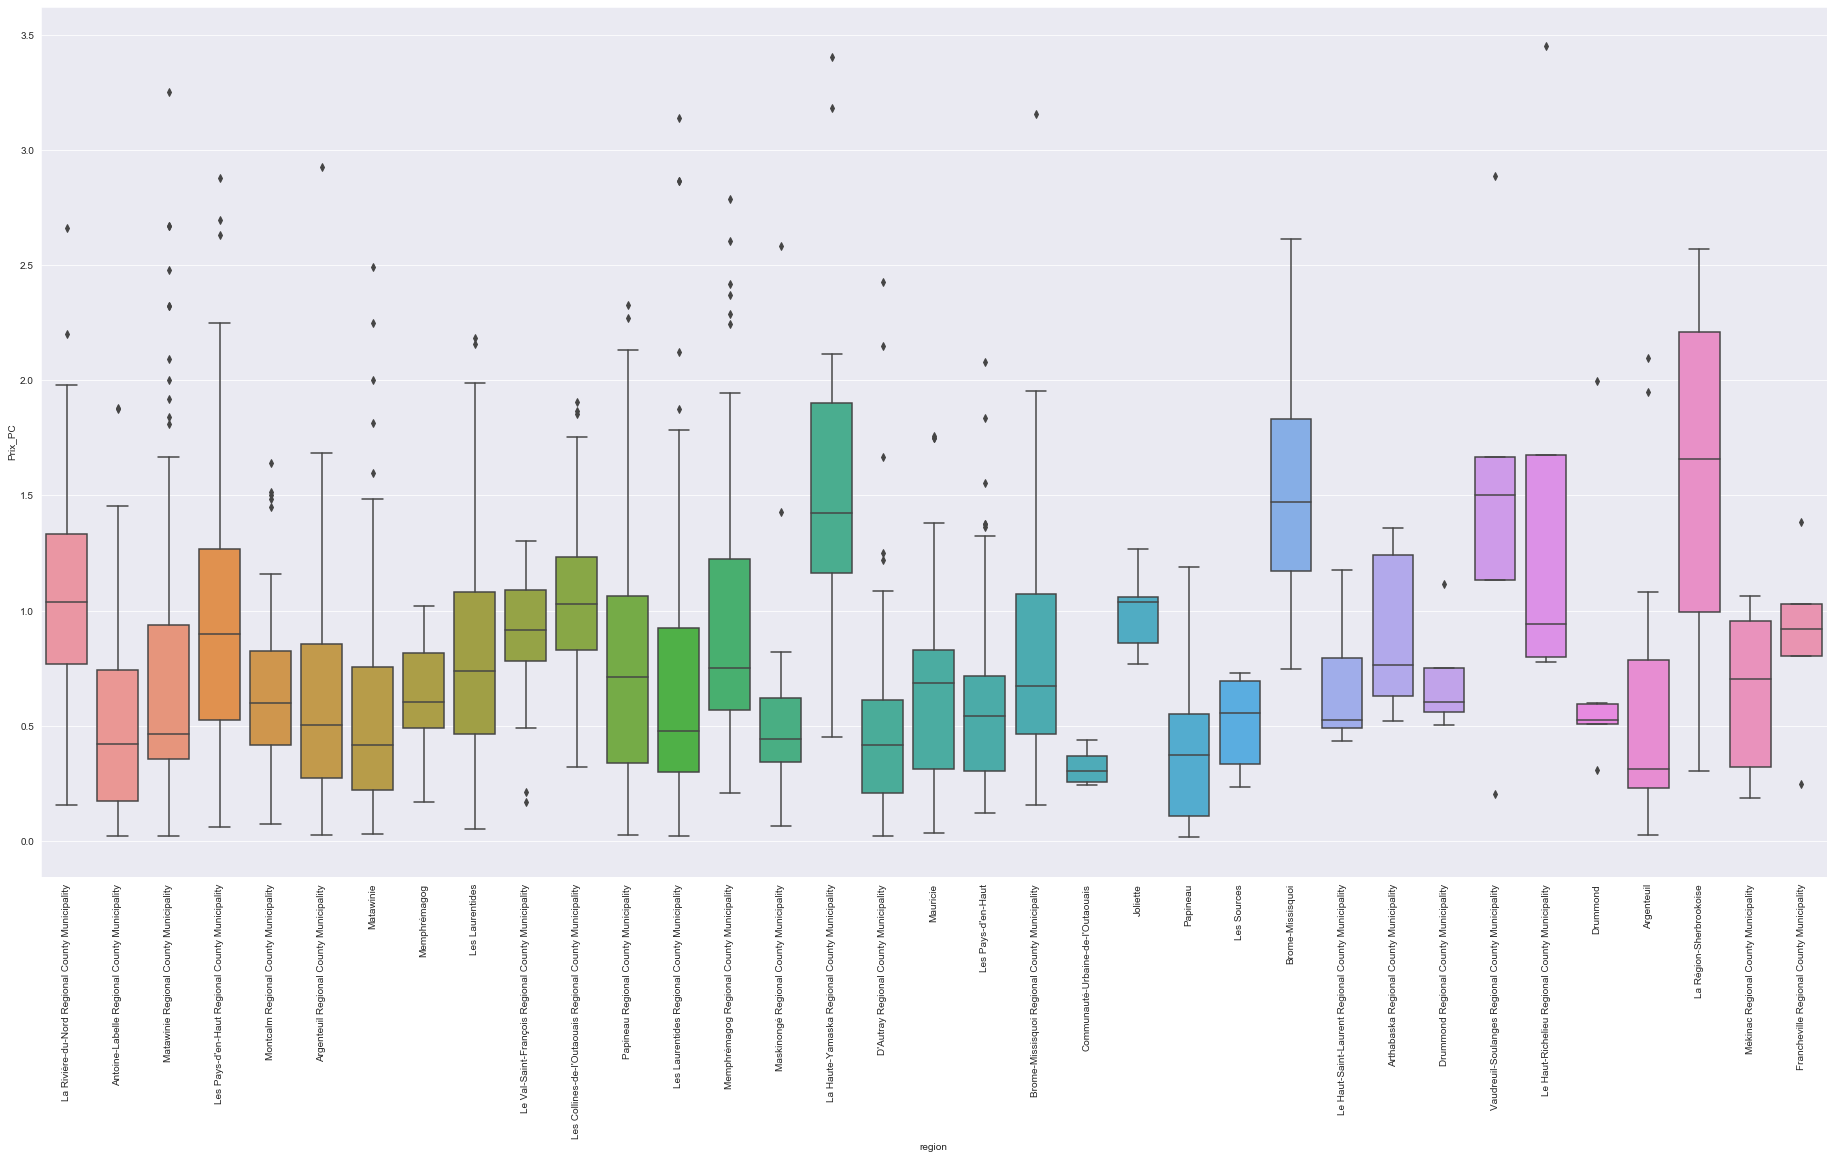

In [194]:
dfregion = df[df.groupby('region').region.transform('count')>3].copy() 

#dfregion.boxplot(column=['Prix_PC'], by='region')
ax = sns.boxplot(x=dfregion.region, y=dfregion.Prix_PC)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Nous voyons des 'outliers' negatifs dans Val-Saint-Francois, Communaute de LOutaouis, Drummond et Francheville. Il pourrait s'agir de bonnes opportunites. Autrement nous pouvons apprecier la difference de distribution de prix entre les regions avec certaines regions notablement plus chere en moyenne.

En validant l'Outaouais, on remarque que le outlier est de 0.24\$ le pied-carre et que la moyenne est de 0.32. En realite, il n'y a que 4 membres de cette region dans nos donnees. Donc le resultat n'est pas si interessant.

In [195]:
df[(df['region'] == 'Communauté-Urbaine-de-l\'Outaouais')]['Prix_PC'].mean()

0.3208425438185319

In [196]:
df[(df['region'] == 'Communauté-Urbaine-de-l\'Outaouais')].nsmallest(5, 'Prix_PC')

,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
1398,392040,95000,L'Ange-Gardien,https://www.centris.ca/fr/terrain~a-vendre~l-a...,2020-01-11,0.24,"Chemin Melvie, L'Ange-Gardien (Outaouais), J8L...",18731435,Magnifique terrain boisé de 9 acres zoné résid...,False,...,ChIJiWNXZYAVzkwReMHqljuKA2I,postal_code,NaN,Gatineau,Communauté-Urbaine-de-l'Outaouais,"L'Ange-Gardien, QC J8L 0E3","165,490.00","6,470.00",165.49,1.80
494,134633,35000,Val-des-Monts,https://www.centris.ca/fr/terrain~a-vendre~val...,2020-01-11,0.26,"406, Chemin du Ruisseau, Val-des-Monts, Quarti...",13635441,Terrain d'approximative 3.5 acres boisé. Plusi...,False,...,ChIJWenmid4bzkwRaSh1M3SC05A,postal_code,NaN,Gatineau,Communauté-Urbaine-de-l'Outaouais,"Val-des-Monts, QC J8R 3H8","189,315.00","7,231.00",189.31,2.01
5940,130684,45000,L'Ange-Gardien,https://www.centris.ca/fr/terrain~a-vendre~l-a...,2020-01-11,0.34,"Chemin Donaldson, L'Ange-Gardien (Outaouais), ...",23195966,"Terrain boisé de 3 acres prêt à construire, 69...",False,...,ChIJ1Y6cQKw9zkwRxEKTfuBDtgQ,postal_code,NaN,Gatineau,Communauté-Urbaine-de-l'Outaouais,"L'Ange-Gardien, QC J8L 2W7","166,728.00","6,767.00",166.73,1.88
6251,89298,39000,L'Ange-Gardien,https://www.centris.ca/fr/terrain~a-vendre~l-a...,2020-01-11,0.44,"1, Chemin Donaldson, L'Ange-Gardien (Outaouais...",14787912,"Terrain boisé de 2 acres prêt à construire, 31...",False,...,ChIJ1Y6cQKw9zkwRxEKTfuBDtgQ,postal_code,NaN,Gatineau,Communauté-Urbaine-de-l'Outaouais,"L'Ange-Gardien, QC J8L 2W7","166,728.00","6,767.00",166.73,1.88


[Text(0, 0, 'La Rivière-du-Nord Regional County Municipality'),
 Text(0, 0, 'Antoine-Labelle Regional County Municipality'),
 Text(0, 0, 'Matawinie Regional County Municipality'),
 Text(0, 0, "Les Pays-d'en-Haut Regional County Municipality"),
 Text(0, 0, 'Montcalm Regional County Municipality'),
 Text(0, 0, 'Argenteuil Regional County Municipality'),
 Text(0, 0, 'Matawinie'),
 Text(0, 0, 'Memphrémagog'),
 Text(0, 0, 'Les Laurentides'),
 Text(0, 0, 'Le Val-Saint-François Regional County Municipality'),
 Text(0, 0, "Les Collines-de-l'Outaouais Regional County Municipality"),
 Text(0, 0, 'Papineau Regional County Municipality'),
 Text(0, 0, 'Les Laurentides Regional County Municipality'),
 Text(0, 0, 'Memphrémagog Regional County Municipality'),
 Text(0, 0, 'Maskinongé Regional County Municipality'),
 Text(0, 0, 'La Haute-Yamaska Regional County Municipality'),
 Text(0, 0, "D'Autray Regional County Municipality"),
 Text(0, 0, 'Mauricie'),
 Text(0, 0, "Les Pays-d'en-Haut"),
 Text(0, 0, 'B

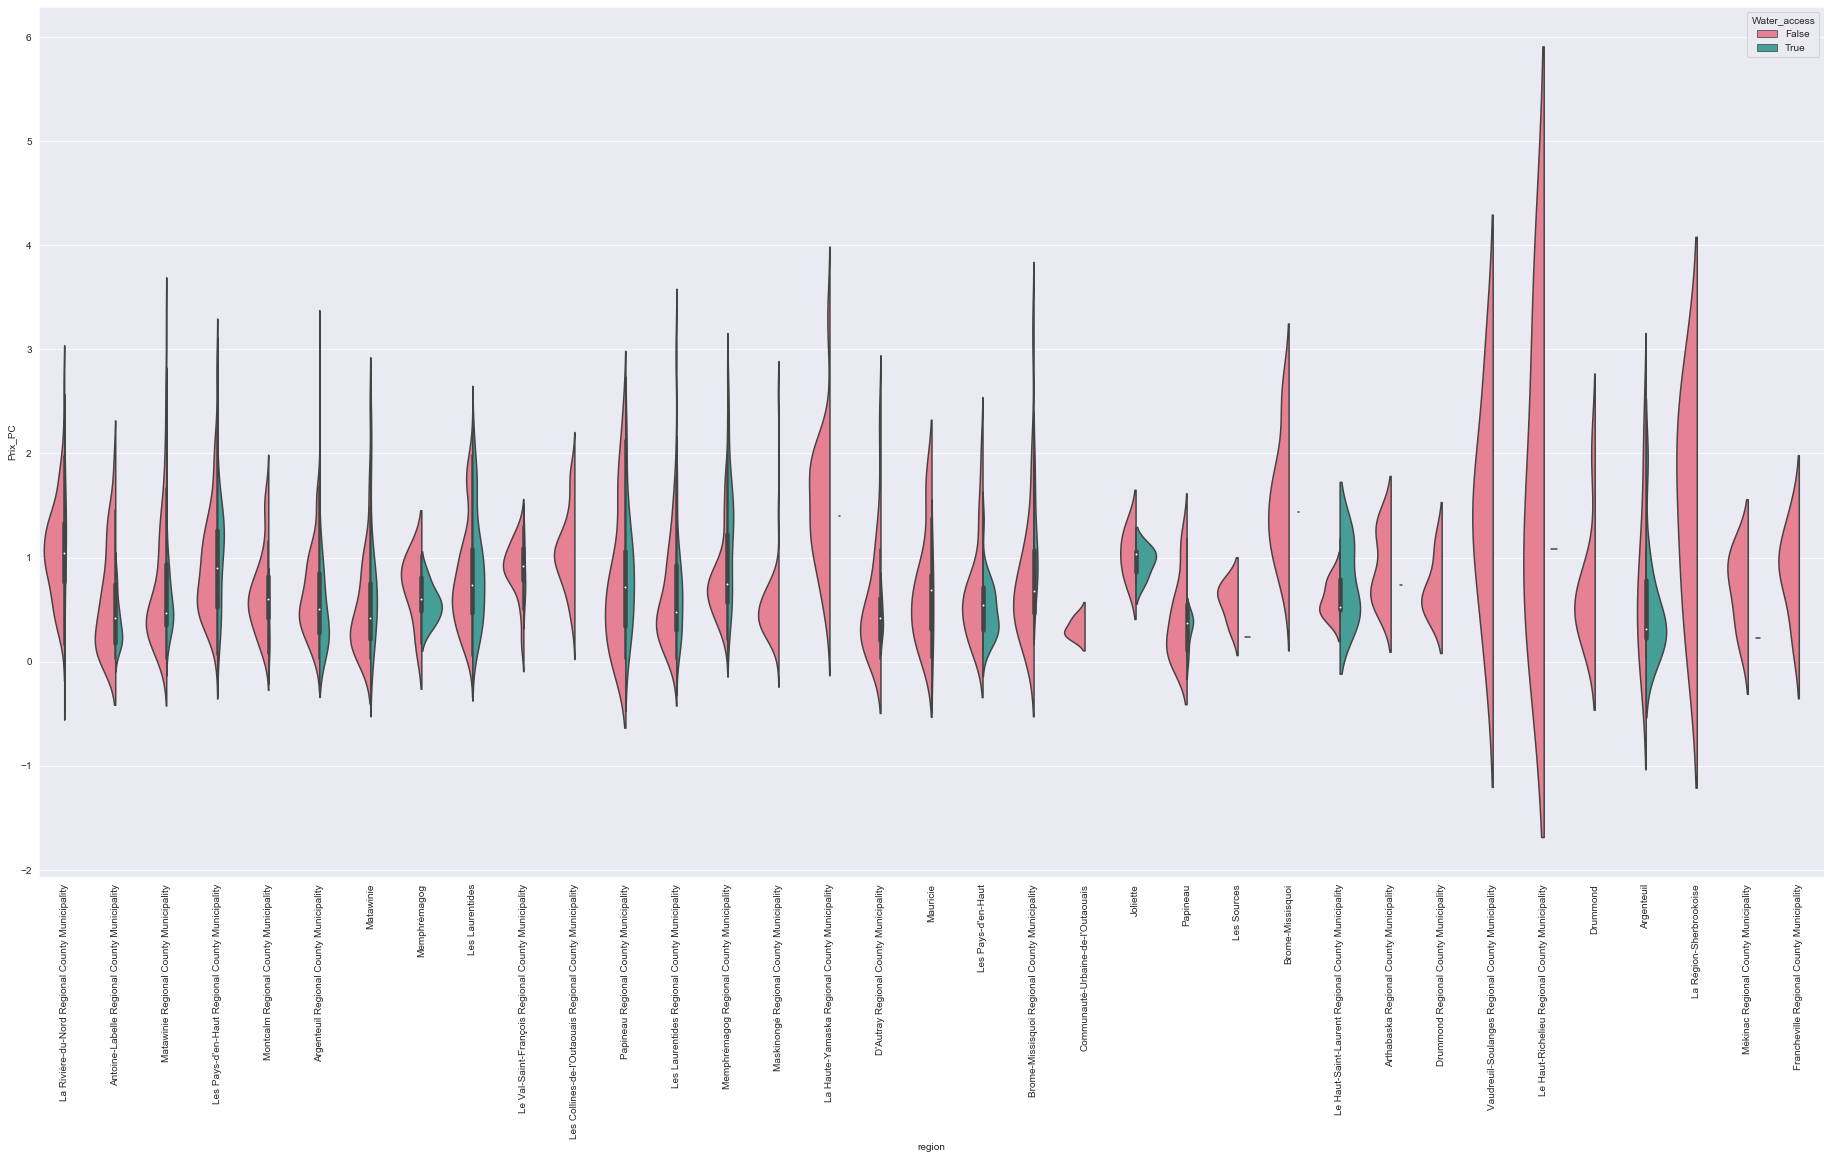

In [197]:
ax = sns.violinplot(x="region", y="Prix_PC", hue="Water_access",
                     data=dfregion, palette="husl", split=True,
                     scale="count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

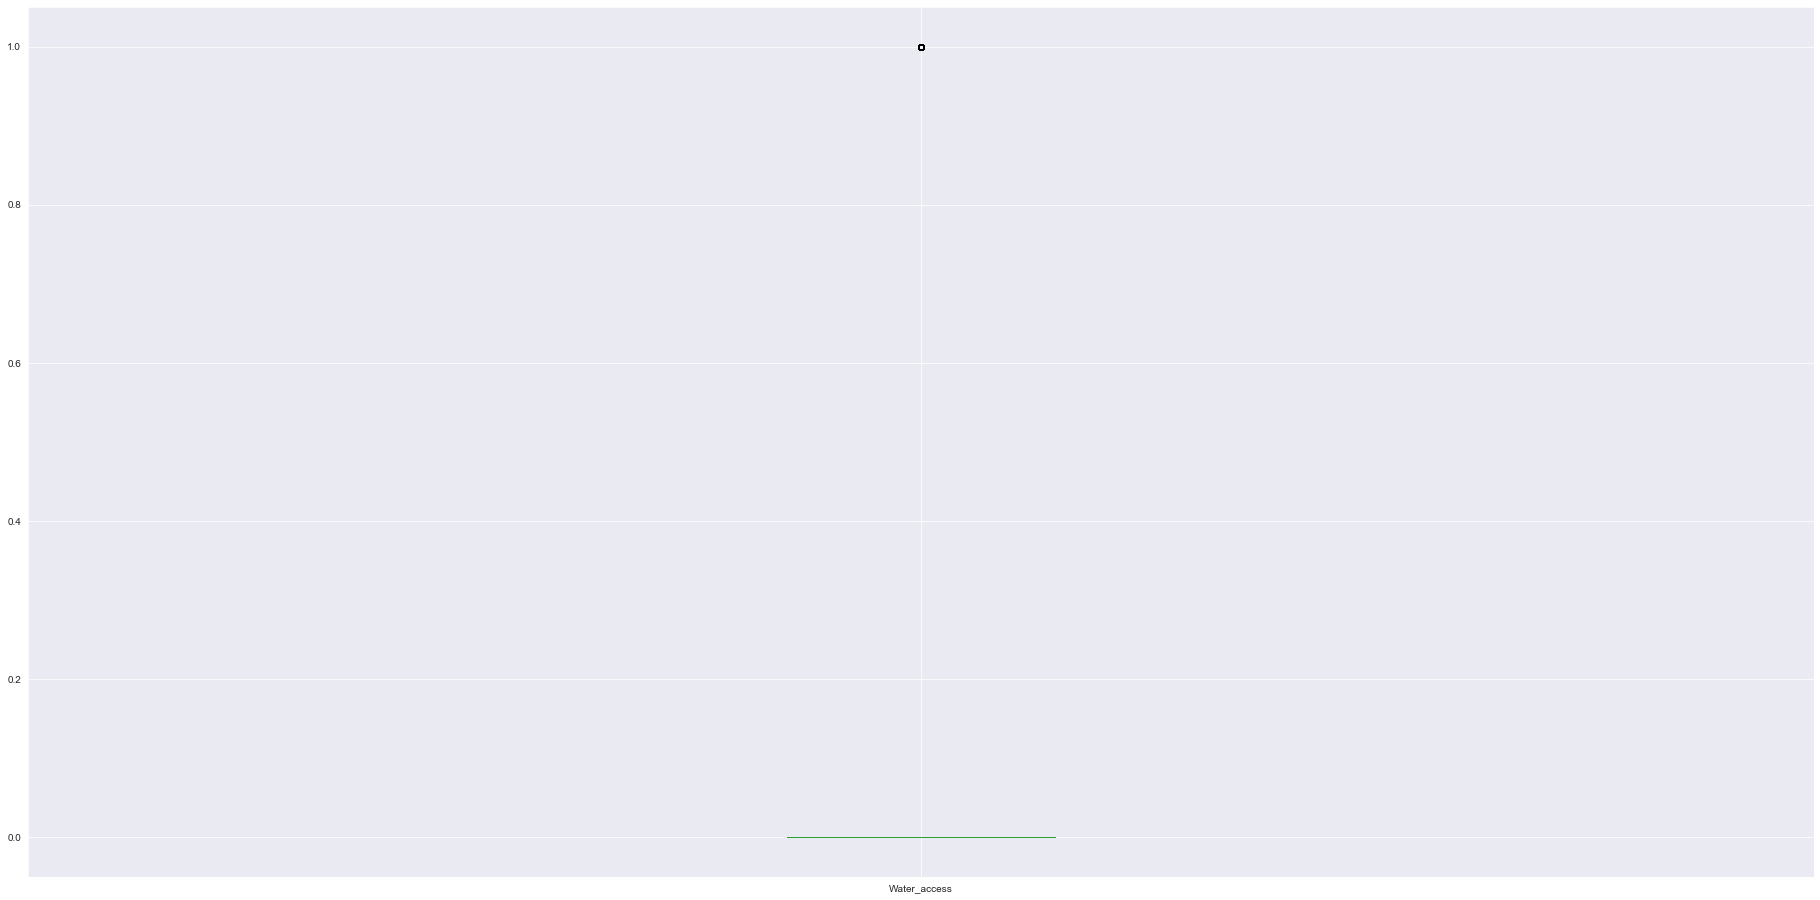

In [198]:
dfregion[['region','Water_access']].boxplot()

## Correlation simple entre les variables et le Prix_PC

- Bien entendu le Prix_PC est en parfaite correlation avec lui-meme.
- Plus la superficie est grande, plus le prix au PC est bas (economie d'echelle)
- Plus le prix du lot des eleve, plus le prix au PC est eleve (lots urbains et lots sur bord de lacs sont vraiment cher s et petits comparativement a la norme)
- Plus la latitude augmente moins le prix est eleve (plus c'est au Nord moins c'est cher)
- Plus la longitude augmente plus le prix augmente (la majorite de nos donnees sont a l'ouest de montreal, donc plus on s'approche de montreal plus le prix augmente)
- Le temps et la distance font baisser le prix. Ils sont une meme mesure exprimee de 2 facons


Text(0.5, 1.0, 'Correlations entre variables et Prix au Pied Carre')

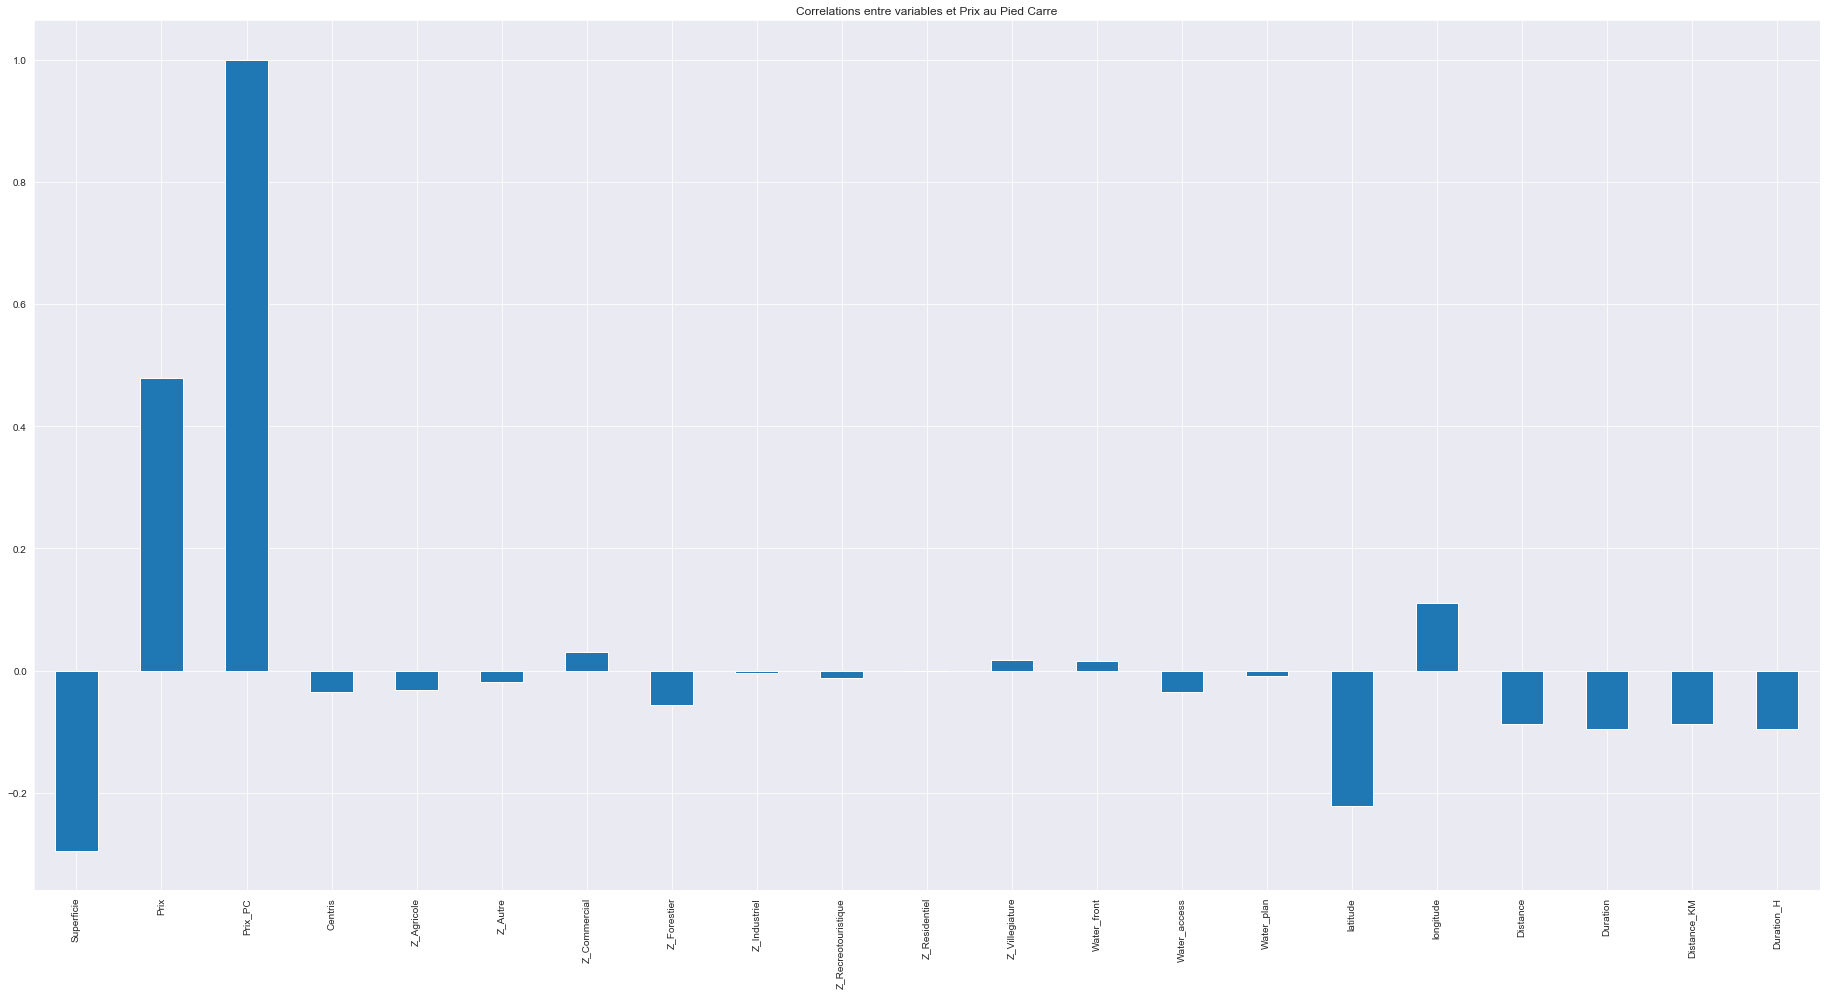

In [199]:
df[df.columns[:]].corr()['Prix_PC'][:]
df[df.columns[:]].corr()['Prix_PC'][:].plot.bar()
plt.title("Correlations entre variables et Prix au Pied Carre")

## Localisation des terrains

![Graph](Figure_1.png)

Les coordonnees du dataset nous donne le carre suivant:

In [200]:
Geo_Zone = ((df.longitude.min(), df.latitude.min(), df.longitude.max(), df.latitude.max()) )
print(Geo_Zone)

(-75.66691229999999, 45.009168, -71.6320142, 46.813268)


## Visualization avancee

Chaque cercle represente une propriete. La circonference du cercle represente la taille du terrain et le couleur represente le prix. 

Plusieurs cercles l'un dans l'autre signifie plusieurs terrain au meme code postal. (les coordonnees ont ete obtenues par code postal).

On voit donc que les grands terrains sont generalement peut cher au pied carre, les petits terrains sont plus chers.

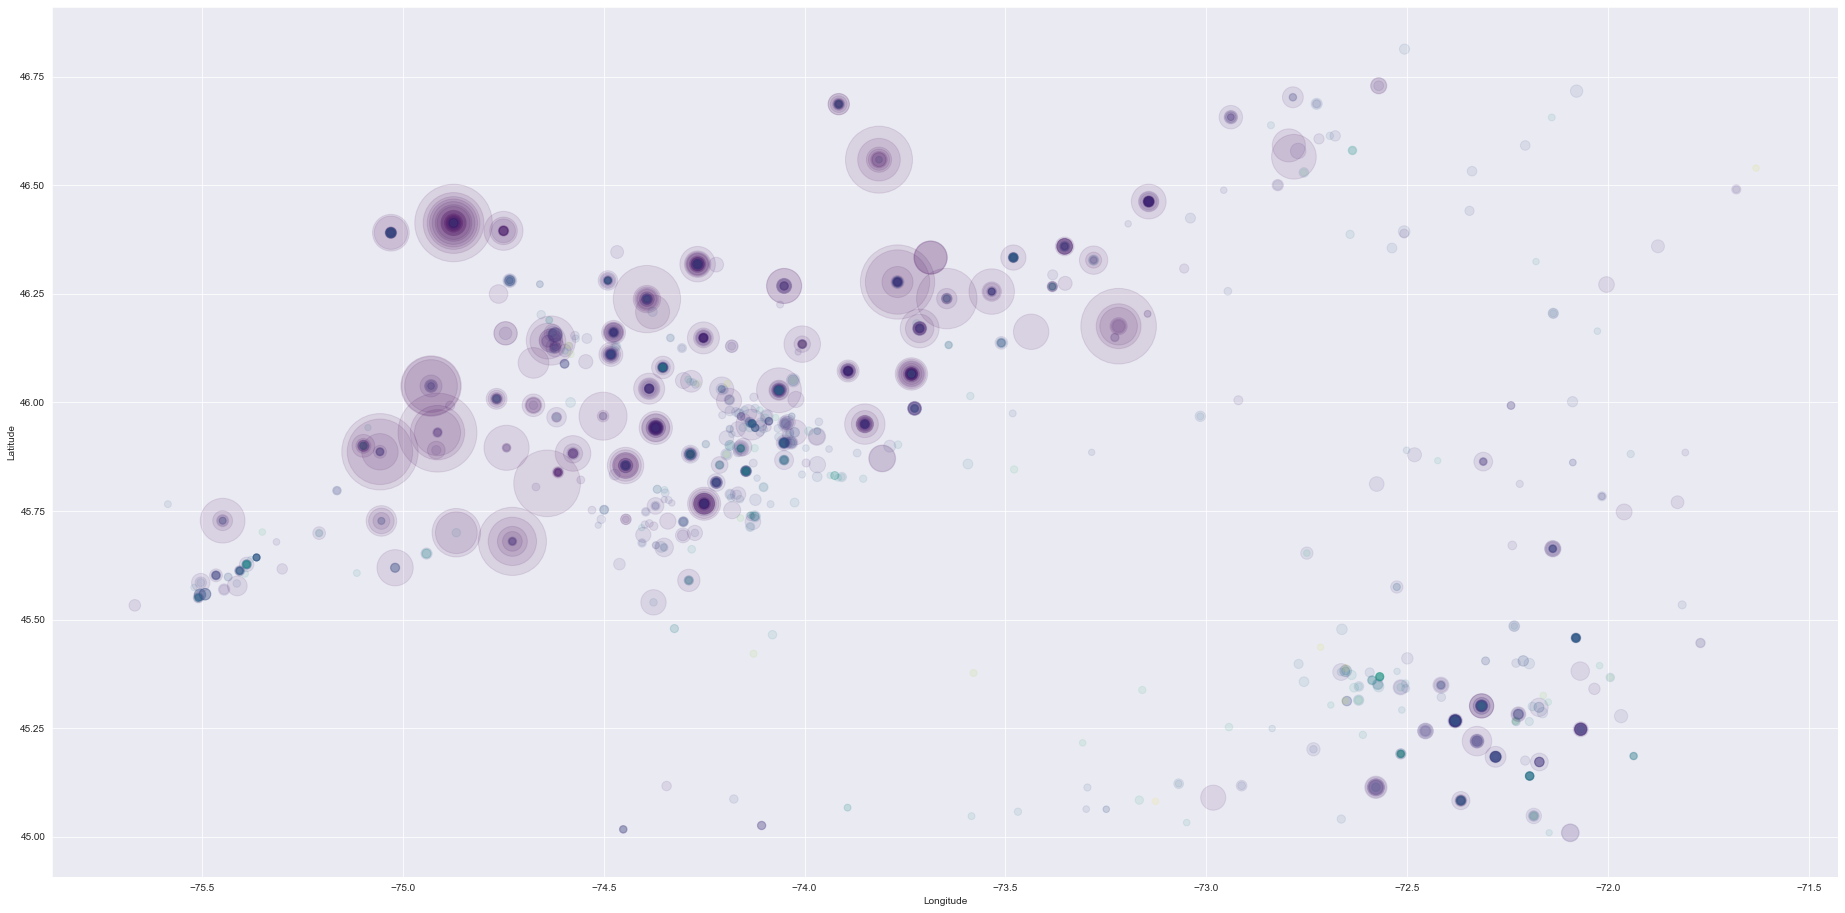

In [201]:
plt.scatter(df['longitude'], df['latitude'], alpha=0.1,
            s=0.001*df['Superficie'], c=df['Prix_PC'], cmap='viridis')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Heatmap de terrains / concentration des terrains

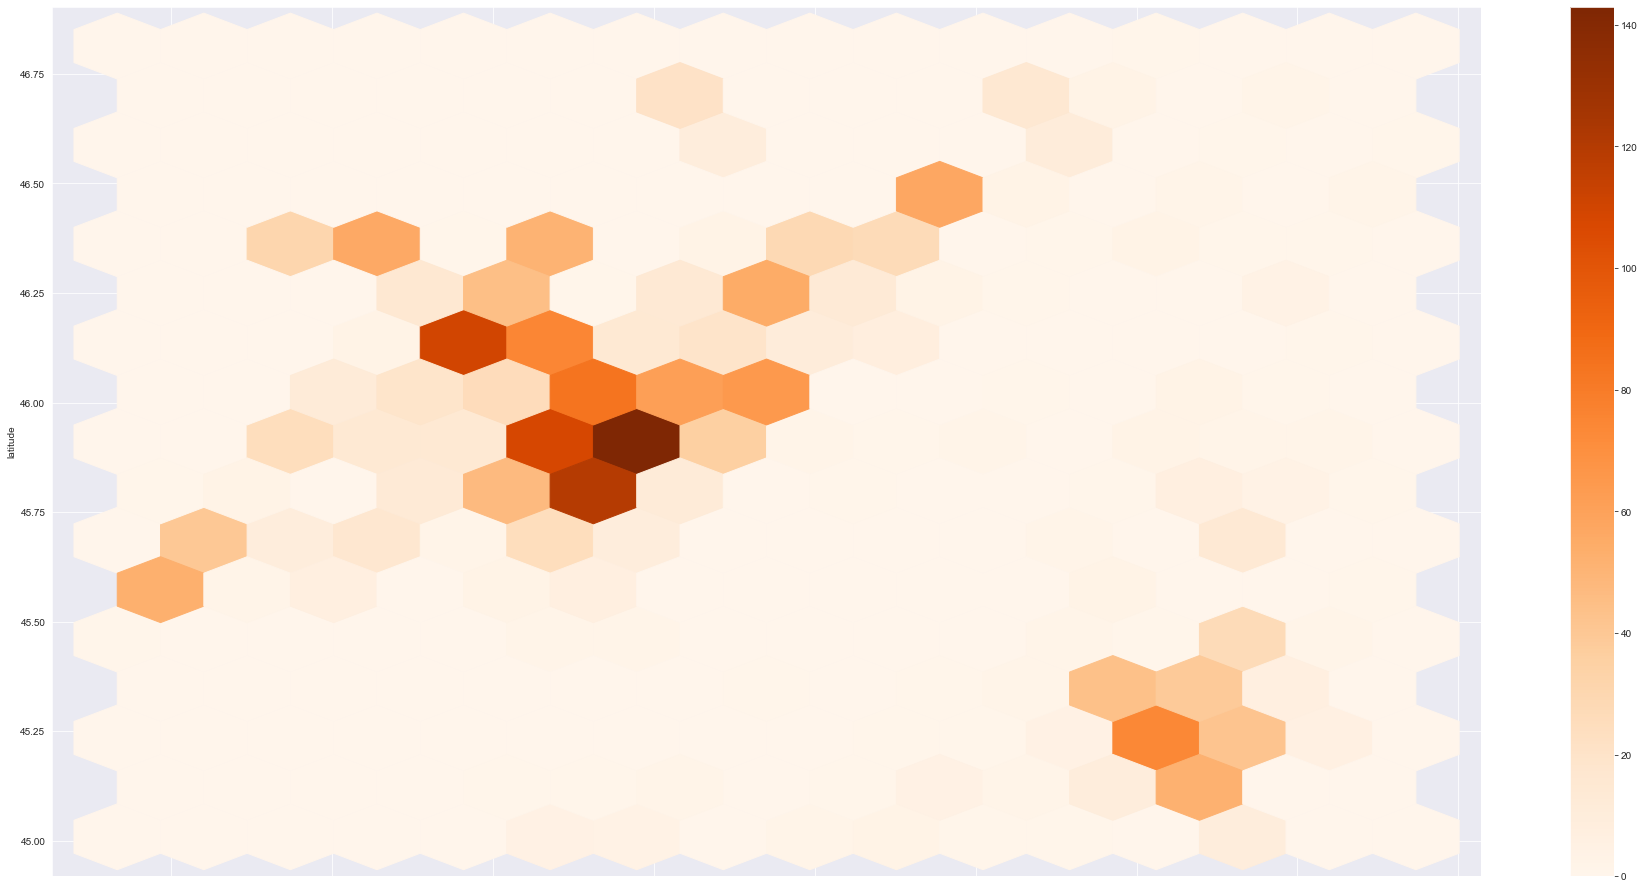

In [202]:

df.plot.hexbin(x ='longitude', y ='latitude', gridsize = 15, cmap ='Oranges') 

## Prix au PC versus Localisation

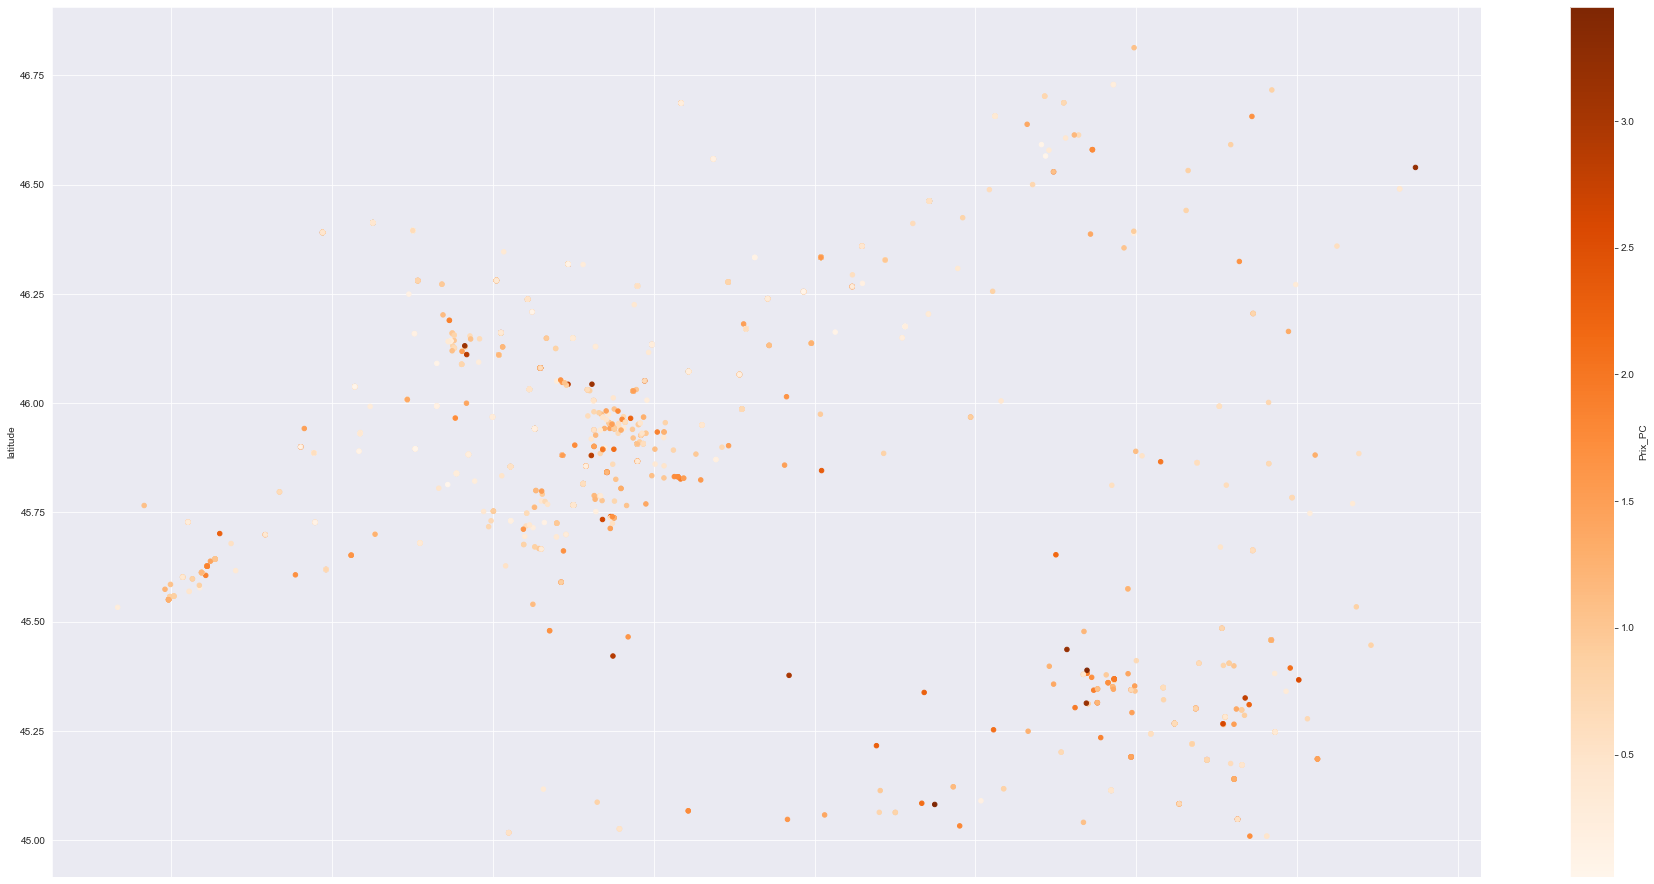

In [203]:
df.plot.scatter(x='longitude',y='latitude', c='Prix_PC', cmap ='Oranges')

### Zoom sur le cluster (46.10, -74)

In [204]:
df2 = df[(df['latitude'] >= 45.75) & (df['longitude'] <= -74.25) & (df['longitude'] >= -75)]
len(df2)

651

In [205]:
Geo_Zoom = ((df2.longitude.min(), df2.latitude.min(), df2.longitude.max(), df2.latitude.max()) )
print(Geo_Zoom)

(-74.9295965, 45.7519842, -74.25, 46.412958)


C'est environ le cadrilatere ci-dessous:

![Zoomin](Zoom.PNG)

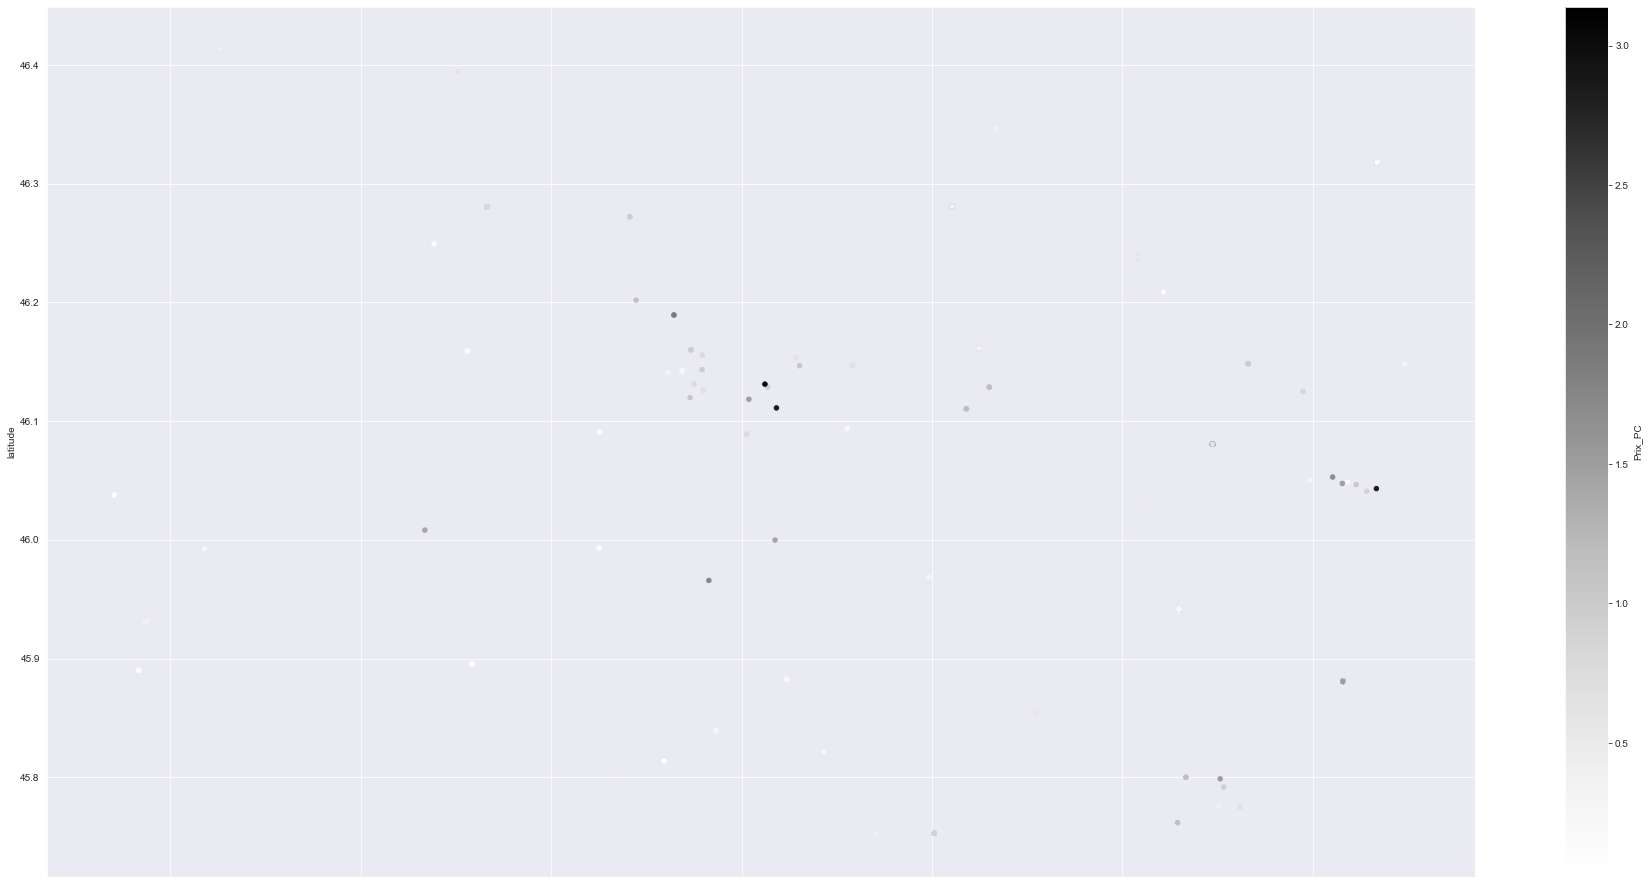

In [206]:
df2.plot.scatter(x='longitude',y='latitude', c='Prix_PC')

Cette selection nous donne 651 proprietes.

In [207]:
print(df2.shape)

(651, 36)


Ce qui couvre les villes suivantes (autour du Mont-Tremblant/Saint-Jovite):

In [208]:
df2.Ville.unique()

array(['La Macaza', 'Lac-Supérieur', 'Gore', 'Lac-des-Plages', 'Labelle',
       'Saint-Donat', 'Sainte-Agathe-des-Monts', 'Harrington',
       'Brownsburg-Chatham', 'Mont-Tremblant', "Saint-Adolphe-d'Howard",
       'Montcalm', 'Val-des-Lacs', 'Huberdeau', 'Saint-Faustin/Lac-Carré',
       'Morin-Heights', 'Rivière-Rouge', 'Wentworth-Nord', 'Amherst',
       'Saint-Émile-de-Suffolk', 'Lantier', 'Wentworth', 'Arundel',
       'Brébeuf', 'Mille-Isles', 'Barkmere', 'La Conception',
       'Ivry-sur-le-Lac', 'Boileau', 'Grenville-sur-la-Rouge', 'Namur'],
      dtype=object)

## Top 6 plus chers du zoom

Les terrains sont beaucoup plus petits que la moyenne et beaucoup plus chers. Dans les plus chers du dataset complet. On voit qu'ils se trouvent majoritairement a Mont-Tremblant et St-Adolphe-DHoward.

In [209]:
df2.nlargest(6,'Prix_PC')

,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
7576,41429,130000,Mont-Tremblant,https://www.centris.ca/fr/terrain~a-vendre~mon...,2020-01-11,3.14,"Rue Estelle, Mont-Tremblant, Quartier Saint-Jo...",22454036,"Une occasion unique terrain de 41,429 pi2 avec...",False,...,ChIJO7VLOat1z0wRW4PrCXT0rj0,postal_code,NaN,Mont-Tremblant,Les Laurentides Regional County Municipality,"Mont-Tremblant, QC J8E 2N9","125,968.00","5,283.00",125.97,1.47
6589,41872,125000,Morin-Heights,https://www.centris.ca/fr/terre~a-vendre~morin...,2020-01-11,2.99,"Rue des Elfes, Morin-Heights, J0R 1H0",14018615,A noter que les dimensions exactes du terrain ...,False,...,ChIJr22pTrs8z0wRQhEoOTQiEMQ,postal_code,NaN,Morin-Heights,NaN,"Morin-Heights, QC J0R 1H0","82,970.00","4,145.00",82.97,1.15
1520,43284,124000,Sainte-Agathe-des-Monts,https://www.centris.ca/fr/terrain~a-vendre~sai...,2020-01-11,2.86,"Rue Deslauriers, Sainte-Agathe-des-Monts, J8C 3N7",13566911,Produit rare sur le marché! Grand terrain avec...,False,...,ChIJM1w6WVMVz0wRmHfP92rJr3c,postal_code,NaN,Sainte-Agathe-des-Monts,Les Laurentides Regional County Municipality,"Sainte-Agathe-des-Monts, QC J8C 3N7","93,795.00","3,992.00",93.80,1.11
6962,47133,135000,Mont-Tremblant,https://www.centris.ca/fr/terrain~a-vendre~mon...,2020-01-11,2.86,"Rue de la Montagne, Mont-Tremblant, Quartier S...",12636540,Centris: 12636540 - Grand terrain de 47 133 pc...,False,...,ChIJ34umPeZ0z0wR_ocV5NjkGyk,postal_code,NaN,Mont-Tremblant,Les Laurentides Regional County Municipality,"Mont-Tremblant, QC J8E 2V2","127,220.00","5,310.00",127.22,1.48
5853,43691,125000,Morin-Heights,https://www.centris.ca/fr/terrain~a-vendre~mor...,2020-01-11,2.86,"Rue des Elfes, Morin-Heights, J0R 1H0",18168903,A noter que les dimensions exactes du terrain ...,False,...,ChIJr22pTrs8z0wRQhEoOTQiEMQ,postal_code,NaN,Morin-Heights,NaN,"Morin-Heights, QC J0R 1H0","82,970.00","4,145.00",82.97,1.15
4411,49288,125000,Morin-Heights,https://www.centris.ca/fr/terrain~a-vendre~mor...,2020-01-11,2.54,"Rue des Elfes, Morin-Heights, J0R 1H0",26530445,A noter que les dimensions exactes du terrain ...,False,...,ChIJr22pTrs8z0wRQhEoOTQiEMQ,postal_code,NaN,Morin-Heights,NaN,"Morin-Heights, QC J0R 1H0","82,970.00","4,145.00",82.97,1.15


## Top 6 moins chers



In [210]:
df2.nsmallest(6,'Prix_PC')

,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
744,2962080,59900,Saint-Émile-de-Suffolk,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.02,"Chemin de la Montagne, Saint-Émile-de-Suffolk,...",26090523,"Superbe terre de 68 acres, à 30 min de Trembla...",False,...,ChIJ8zu9g1Guz0wRq9CWGCofhX8,"locality,political",Saint-Émile-de-Suffolk,Saint-Émile-de-Suffolk,Papineau,"Saint-Émile-de-Suffolk, QC J0V 1Y0","155,890.00","6,272.00",155.89,1.74
3048,6229080,129900,Saint-Émile-de-Suffolk,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.02,"Chemin de la Montagne, Saint-Émile-de-Suffolk,...",19155599,"Superbe terre de 143 acres, à 30 min de Trembl...",False,...,ChIJ8zu9g1Guz0wRq9CWGCofhX8,"locality,political",Saint-Émile-de-Suffolk,Saint-Émile-de-Suffolk,Papineau,"Saint-Émile-de-Suffolk, QC J0V 1Y0","155,890.00","6,272.00",155.89,1.74
2631,4527101,99900,Val-des-Lacs,https://www.centris.ca/fr/terrain~a-vendre~val...,2020-01-11,0.02,"Chemin de Val-des-Lacs, Val-des-Lacs, J0T 2P0",12857567,Immense terrain de plus 4 500 000 pc avec 2 op...,False,...,ChIJu0iadc96z0wRVBl0eOpgWg0,"administrative_area_level_3,political",Val-des-Lacs,Val-des-Lacs,Les Laurentides Regional County Municipality,"Val-des-Lacs, QC J0T 2P0","133,566.00","5,909.00",133.57,1.64
7604,3702600,85000,Rivière-Rouge,https://www.centris.ca/fr/terre~a-vendre~rivie...,2020-01-11,0.02,"Chemin Laliberté, Rivière-Rouge, Quartier Marc...",19154690,Terre boisée de presque 85 acres à vendre à Ri...,False,...,ChIJ0aE2E6hixUwRnO84bafC8E8,postal_code,NaN,Rivière-Rouge,Antoine-Labelle Regional County Municipality,"Rivière-Rouge, QC J0T 1T0","170,887.00","6,981.00",170.89,1.94
3619,6011280,146000,Rivière-Rouge,https://www.centris.ca/fr/terre~a-vendre~rivie...,2020-01-11,0.02,"Chemin Laliberté, Rivière-Rouge, Quartier Marc...",26677058,À moins de 2 heures de Montréal et d'Ottawa. M...,False,...,ChIJ0aE2E6hixUwRnO84bafC8E8,postal_code,NaN,Rivière-Rouge,Antoine-Labelle Regional County Municipality,"Rivière-Rouge, QC J0T 1T0","170,887.00","6,981.00",170.89,1.94
6272,4443120,109000,Harrington,https://www.centris.ca/fr/terrain~a-vendre~har...,2020-01-11,0.02,"Chemin MacLeod, Harrington, J8G 2S6",14849726,Grand terrain boisé pour amateur de plein air....,False,...,ChIJPf3dcBADz0wR5nU7EUl3V3k,postal_code,Harrington,Harrington,Argenteuil,"Harrington, QC J8G 2S6","120,711.00","5,512.00",120.71,1.53


## Analysis

In [211]:
dfcheap = df[(df.Prix <= 85000) & (df.Prix_PC > 0.01)]
len(dfcheap)

1600

In [212]:
dfcheap.nsmallest(10,'Prix_PC')

,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
8448,4290660,74900,Chénéville,https://www.centris.ca/fr/terrain~a-vendre~che...,2020-01-11,0.02,"Chemin Bédard, Chénéville, J0V 1E0",15467044,Magnifique terrain boisé de 98.5 acres situé p...,False,...,ChIJgWwIzKizz0wRd8jNr0Omh5U,"locality,political",Chénéville,Chénéville,Papineau,"Chénéville, QC J0V 1E0","156,491.00","6,426.00",156.49,1.78
744,2962080,59900,Saint-Émile-de-Suffolk,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.02,"Chemin de la Montagne, Saint-Émile-de-Suffolk,...",26090523,"Superbe terre de 68 acres, à 30 min de Trembla...",False,...,ChIJ8zu9g1Guz0wRq9CWGCofhX8,"locality,political",Saint-Émile-de-Suffolk,Saint-Émile-de-Suffolk,Papineau,"Saint-Émile-de-Suffolk, QC J0V 1Y0","155,890.00","6,272.00",155.89,1.74
7604,3702600,85000,Rivière-Rouge,https://www.centris.ca/fr/terre~a-vendre~rivie...,2020-01-11,0.02,"Chemin Laliberté, Rivière-Rouge, Quartier Marc...",19154690,Terre boisée de presque 85 acres à vendre à Ri...,False,...,ChIJ0aE2E6hixUwRnO84bafC8E8,postal_code,NaN,Rivière-Rouge,Antoine-Labelle Regional County Municipality,"Rivière-Rouge, QC J0T 1T0","170,887.00","6,981.00",170.89,1.94
3571,1810658,55000,Saint-Zénon,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.03,"Chemin Lafortune, Saint-Zénon, J0K 3N0",28692547,Belle terre de 1 810 560pc ou 49.2 arpents ou ...,False,...,ChIJE9BlhxjpxUwReD_FBU9p03Y,"locality,political",Saint-Zénon,Saint-Zénon,Matawinie,"Saint-Zénon, QC J0K 3N0","139,739.00","6,223.00",139.74,1.73
1586,2003760,63000,L'Ange-Gardien,https://www.centris.ca/fr/terrain~a-vendre~l-a...,2020-01-11,0.03,"Chemin Couture, L'Ange-Gardien (Outaouais), J8...",21018837,"WOW! Beau terrain boisé de 46 acres, beaucoup ...",False,...,ChIJC0bWIHowzkwRGzaRhmnJg7M,postal_code,NaN,L'Ange-Gardien,NaN,"L'Ange-Gardien, QC J8L 2W9","177,785.00","7,106.00",177.78,1.97
5711,2037301,65000,Boileau,https://www.centris.ca/fr/terre~a-vendre~boile...,2020-01-11,0.03,"Chemin Woodbury, Boileau, J0V 1N0",14573577,Beau terrain de 46 acres pour les amants de la...,False,...,ChIJG030j5UAz0wRhDql8H9bU90,postal_code,NaN,Boileau,NaN,"Boileau, QC J0V 1N0","135,351.00","6,640.00",135.35,1.84
5256,2006635,69000,Saint-Cuthbert,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.03,"4391A, Rang Saint-Amable, Saint-Cuthbert, J0K 2C0",20890238,terre a bois de 54.5 arpents mature et diversi...,False,...,ChIJtxEZgKmeyEwRi_uynLoFG44,postal_code,NaN,Saint-Cuthbert,D'Autray Regional County Municipality,"Saint-Cuthbert, QC J0K 2C0","83,505.00","3,526.00",83.50,0.98
5123,1416201,49000,Saint-Cuthbert,https://www.centris.ca/fr/terrain~a-vendre~sai...,2020-01-11,0.03,"Rang Saint-Amable, Saint-Cuthbert, J0K 2C0",20560592,Terre a bois de 32.5 acres composée de bois mi...,False,...,ChIJtxEZgKmeyEwRi_uynLoFG44,postal_code,NaN,Saint-Cuthbert,D'Autray Regional County Municipality,"Saint-Cuthbert, QC J0K 2C0","83,505.00","3,526.00",83.50,0.98
1000,1998510,70000,Shawinigan,https://www.centris.ca/fr/terre~a-vendre~shawi...,2020-01-11,0.04,"Chemin des Bois-Francs, Shawinigan, Quartier S...",10322049,"Terre de 54 arpents avec possibilité de bâtir,...",False,...,ChIJyXCqNtZNxkwREl3quGX20hY,postal_code,NaN,Shawinigan,Mauricie,"Shawinigan, QC G9N 6T6","156,960.00","5,836.00",156.96,1.62
6617,1268849,49000,Harrington,https://www.centris.ca/fr/terrain~a-vendre~har...,2020-01-11,0.04,"Chemin Nason, Harrington, J8G 2T3",23083084,Exceptionnel! Terrain de plus de 29 acres avec...,False,...,ChIJXxCIGtQEz0wRkw15mfKsqww,postal_code,Harrington,Harrington,Argenteuil,"Harrington, QC J8G 2T3","114,739.00","5,650.00",114.74,1.57


## Top 10 moins cher avec plus grande superficie

In [213]:
dfcheap.nlargest(10,'Superficie')

,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
8448,4290660,74900,Chénéville,https://www.centris.ca/fr/terrain~a-vendre~che...,2020-01-11,0.02,"Chemin Bédard, Chénéville, J0V 1E0",15467044,Magnifique terrain boisé de 98.5 acres situé p...,False,...,ChIJgWwIzKizz0wRd8jNr0Omh5U,"locality,political",Chénéville,Chénéville,Papineau,"Chénéville, QC J0V 1E0","156,491.00","6,426.00",156.49,1.78
7604,3702600,85000,Rivière-Rouge,https://www.centris.ca/fr/terre~a-vendre~rivie...,2020-01-11,0.02,"Chemin Laliberté, Rivière-Rouge, Quartier Marc...",19154690,Terre boisée de presque 85 acres à vendre à Ri...,False,...,ChIJ0aE2E6hixUwRnO84bafC8E8,postal_code,NaN,Rivière-Rouge,Antoine-Labelle Regional County Municipality,"Rivière-Rouge, QC J0T 1T0","170,887.00","6,981.00",170.89,1.94
744,2962080,59900,Saint-Émile-de-Suffolk,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.02,"Chemin de la Montagne, Saint-Émile-de-Suffolk,...",26090523,"Superbe terre de 68 acres, à 30 min de Trembla...",False,...,ChIJ8zu9g1Guz0wRq9CWGCofhX8,"locality,political",Saint-Émile-de-Suffolk,Saint-Émile-de-Suffolk,Papineau,"Saint-Émile-de-Suffolk, QC J0V 1Y0","155,890.00","6,272.00",155.89,1.74
5711,2037301,65000,Boileau,https://www.centris.ca/fr/terre~a-vendre~boile...,2020-01-11,0.03,"Chemin Woodbury, Boileau, J0V 1N0",14573577,Beau terrain de 46 acres pour les amants de la...,False,...,ChIJG030j5UAz0wRhDql8H9bU90,postal_code,NaN,Boileau,NaN,"Boileau, QC J0V 1N0","135,351.00","6,640.00",135.35,1.84
5256,2006635,69000,Saint-Cuthbert,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.03,"4391A, Rang Saint-Amable, Saint-Cuthbert, J0K 2C0",20890238,terre a bois de 54.5 arpents mature et diversi...,False,...,ChIJtxEZgKmeyEwRi_uynLoFG44,postal_code,NaN,Saint-Cuthbert,D'Autray Regional County Municipality,"Saint-Cuthbert, QC J0K 2C0","83,505.00","3,526.00",83.50,0.98
1586,2003760,63000,L'Ange-Gardien,https://www.centris.ca/fr/terrain~a-vendre~l-a...,2020-01-11,0.03,"Chemin Couture, L'Ange-Gardien (Outaouais), J8...",21018837,"WOW! Beau terrain boisé de 46 acres, beaucoup ...",False,...,ChIJC0bWIHowzkwRGzaRhmnJg7M,postal_code,NaN,L'Ange-Gardien,NaN,"L'Ange-Gardien, QC J8L 2W9","177,785.00","7,106.00",177.78,1.97
1000,1998510,70000,Shawinigan,https://www.centris.ca/fr/terre~a-vendre~shawi...,2020-01-11,0.04,"Chemin des Bois-Francs, Shawinigan, Quartier S...",10322049,"Terre de 54 arpents avec possibilité de bâtir,...",False,...,ChIJyXCqNtZNxkwREl3quGX20hY,postal_code,NaN,Shawinigan,Mauricie,"Shawinigan, QC G9N 6T6","156,960.00","5,836.00",156.96,1.62
3571,1810658,55000,Saint-Zénon,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.03,"Chemin Lafortune, Saint-Zénon, J0K 3N0",28692547,Belle terre de 1 810 560pc ou 49.2 arpents ou ...,False,...,ChIJE9BlhxjpxUwReD_FBU9p03Y,"locality,political",Saint-Zénon,Saint-Zénon,Matawinie,"Saint-Zénon, QC J0K 3N0","139,739.00","6,223.00",139.74,1.73
4005,1742400,80000,Notre-Dame-de-Bonsecours,https://www.centris.ca/fr/terrain~a-vendre~not...,2020-01-11,0.05,"Rue Non Disponible-Unavailable, Notre-Dame-de-...",19611132,Magnifique Lot de 40 acres idéal pour chasseur...,False,...,ChIJ-bv1Rof4zkwRblhyXbOlbgc,"locality,political",Notre-Dame-de-Bon-Secours-Partie-Nord,Notre-Dame-de-Bonsecours,Papineau Regional County Municipality,"Notre-Dame-de-Bonsecours, QC J0V 1L0","133,051.00","5,690.00",133.05,1.58
5123,1416201,49000,Saint-Cuthbert,https://www.centris.ca/fr/terrain~a-vendre~sai...,2020-01-11,0.03,"Rang Saint-Amable, Saint-Cuthbert, J0K 2C0",20560592,Terre a bois de 32.5 acres composée de bois mi...,False,...,ChIJtxEZgKmeyEwRi_uynLoFG44,postal_code,NaN,Saint-Cuthbert,D'Autray Regional County Municipality,"Saint-Cuthbert, QC J0K 2C0","83,505.00","3,526.00",83.50,0.98


In [214]:
print(df[(df['Ville'] == 'Grenville-sur-la-Rouge')]['Prix_PC'].mean())
df[(df['Ville'] == 'Grenville-sur-la-Rouge')]

0.3939554751847101


,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
1766,58440,75000,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terrain~a-vendre~gre...,2020-01-11,1.28,"Chemin du Panorama, Grenville-sur-la-Rouge, Qu...",28414223,***VUE PANORAMIQUE SUR LA RIVIÈRE OUTAOUAIS***...,False,...,ChIJZyGuud78zkwRcjAoVAeBRk8,"administrative_area_level_3,political",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J0V 1B0","111,050.00","4,664.00",111.05,1.30
4109,44790,20997,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terrain~a-vendre~gre...,2020-01-11,0.47,"Rue Blue-Héron, Grenville-sur-la-Rouge, Quarti...",16086417,Terrain au bord de l'eau prêt à construire vot...,False,...,ChIJZyGuud78zkwRcjAoVAeBRk8,"administrative_area_level_3,political",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J0V 1B0","111,050.00","4,664.00",111.05,1.30
4331,2332768,145000,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terre~a-vendre~grenv...,2020-01-11,0.06,"Sentier Baines, Grenville-sur-la-Rouge, Quarti...",17757247,Coin de Paradis! 50 acres au BORD DU LAC Craig...,False,...,ChIJZyGuud78zkwRcjAoVAeBRk8,"administrative_area_level_3,political",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J0V 1B0","111,050.00","4,664.00",111.05,1.30
4941,4645710,114000,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terre~a-vendre~grenv...,2020-01-11,0.02,"Chemin Scotch, Grenville-sur-la-Rouge, Quartie...",22804522,Terre 106 acres.,False,...,ChIJZyGuud78zkwRcjAoVAeBRk8,"administrative_area_level_3,political",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J0V 1B0","111,050.00","4,664.00",111.05,1.30
5095,894289,35000,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terrain~a-vendre~gre...,2020-01-11,0.04,"Chemin des Cavaliers, Grenville-sur-la-Rouge, ...",18462124,"Magnifique terrain de 24,30 arpents situé à Gr...",False,...,ChIJZyGuud78zkwRcjAoVAeBRk8,"administrative_area_level_3,political",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J0V 1J0","111,050.00","4,664.00",111.05,1.30
5306,45369,11000,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terrain~a-vendre~gre...,2020-01-11,0.24,"Chemin des Hauteurs, Grenville-sur-la-Rouge, Q...",28951661,Terrain en montagne en pente.Construction rési...,False,...,ChIJZyGuud78zkwRcjAoVAeBRk8,"administrative_area_level_3,political",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J0V 1B0","111,050.00","4,664.00",111.05,1.30
5321,40567,34900,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terrain~a-vendre~gre...,2020-01-11,0.86,"Rue Riverview, Grenville-sur-la-Rouge, Quartie...",17552412,Beau grand terrain plat de 40567 pieds carrés ...,False,...,ChIJZyGuud78zkwRcjAoVAeBRk8,"administrative_area_level_3,political",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J0V 1B0","111,050.00","4,664.00",111.05,1.30
5569,60659,25000,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terrain~a-vendre~gre...,2020-01-11,0.41,"Chemin du Lac-Campbell, Grenville-sur-la-Rouge...",19079340,Magnifique terrain plat d'une acre et demi à 1...,False,...,ChIJWfz_1R_izkwRWQqNk6EapOI,"establishment,food,lodging,point_of_interest,r...",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J8V 1B0","102,428.00","4,611.00",102.43,1.28
7971,386813,24400,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terrain~a-vendre~gre...,2020-01-11,0.06,"Chemin Scotch, Grenville-sur-la-Rouge, Quartie...",28502948,Beau grand terrain de plus de 8

## Moins cher que la moyenne a Grenville

In [215]:
thismean = df[(df['Ville'] == 'Grenville-sur-la-Rouge')]['Prix_PC'].mean()
df[(df['Ville'] == 'Grenville-sur-la-Rouge') & (df['Prix_PC'] <= thismean)]

,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
4331,2332768,145000,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terre~a-vendre~grenv...,2020-01-11,0.06,"Sentier Baines, Grenville-sur-la-Rouge, Quarti...",17757247,Coin de Paradis! 50 acres au BORD DU LAC Craig...,False,...,ChIJZyGuud78zkwRcjAoVAeBRk8,"administrative_area_level_3,political",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J0V 1B0","111,050.00","4,664.00",111.05,1.30
4941,4645710,114000,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terre~a-vendre~grenv...,2020-01-11,0.02,"Chemin Scotch, Grenville-sur-la-Rouge, Quartie...",22804522,Terre 106 acres.,False,...,ChIJZyGuud78zkwRcjAoVAeBRk8,"administrative_area_level_3,political",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J0V 1B0","111,050.00","4,664.00",111.05,1.30
5095,894289,35000,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terrain~a-vendre~gre...,2020-01-11,0.04,"Chemin des Cavaliers, Grenville-sur-la-Rouge, ...",18462124,"Magnifique terrain de 24,30 arpents situé à Gr...",False,...,ChIJZyGuud78zkwRcjAoVAeBRk8,"administrative_area_level_3,political",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J0V 1J0","111,050.00","4,664.00",111.05,1.30
5306,45369,11000,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terrain~a-vendre~gre...,2020-01-11,0.24,"Chemin des Hauteurs, Grenville-sur-la-Rouge, Q...",28951661,Terrain en montagne en pente.Construction rési...,False,...,ChIJZyGuud78zkwRcjAoVAeBRk8,"administrative_area_level_3,political",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J0V 1B0","111,050.00","4,664.00",111.05,1.30
7971,386813,24400,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terrain~a-vendre~gre...,2020-01-11,0.06,"Chemin Scotch, Grenville-sur-la-Rouge, Quartie...",28502948,Beau grand terrain de plus de 8 acres bordé pa...,False,...,ChIJZyGuud78zkwRcjAoVAeBRk8,"administrative_area_level_3,political",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J0V 1B0","111,050.00","4,664.00",111.05,1.30
8557,82731,27000,Grenville-sur-la-Rouge,https://www.centris.ca/fr/terrain~a-vendre~gre...,2020-01-11,0.33,"Chemin des Hauteurs, Grenville-sur-la-Rouge, Q...",20417998,"Beau grand terrain en montagne,vous pouvez y c...",False,...,ChIJZyGuud78zkwRcjAoVAeBRk8,"administrative_area_level_3,political",Grenville-sur-la-Rouge,Grenville-sur-la-Rouge,Argenteuil Regional County Municipality,"Grenville-sur-la-Rouge, QC J0V 1B0","111,050.00","4,664.00",111.05,1.30


## Table average per city

In [216]:
df[['Ville', 'Superficie','Prix','Prix_PC','Duration_H']].groupby(['Ville']).mean().sort_values('Prix_PC')

,Superficie,Prix,Prix_PC,Duration_H
Ville,,,,
Saint-Félix-de-Valois,"1,253,223.00","99,000.00",0.08,1.00
Brébeuf,"944,381.00","79,000.00",0.08,1.59
Sainte-Émélie-de-l'Énergie,"1,092,606.33","105,000.00",0.10,1.50
Bedford - Canton,"629,688.00","99,000.00",0.16,1.23
Saint-Cuthbert,"1,240,114.12","50,862.50",0.17,0.97
...,...,...,...,...
L'Épiphanie,"53,619.00","124,900.00",2.33,0.59
Venise-en-Québec,"55,535.50","144,500.00",2.78,1.13
Saint-Lazare,"48,473.00","139,999.00",2.89,0.74


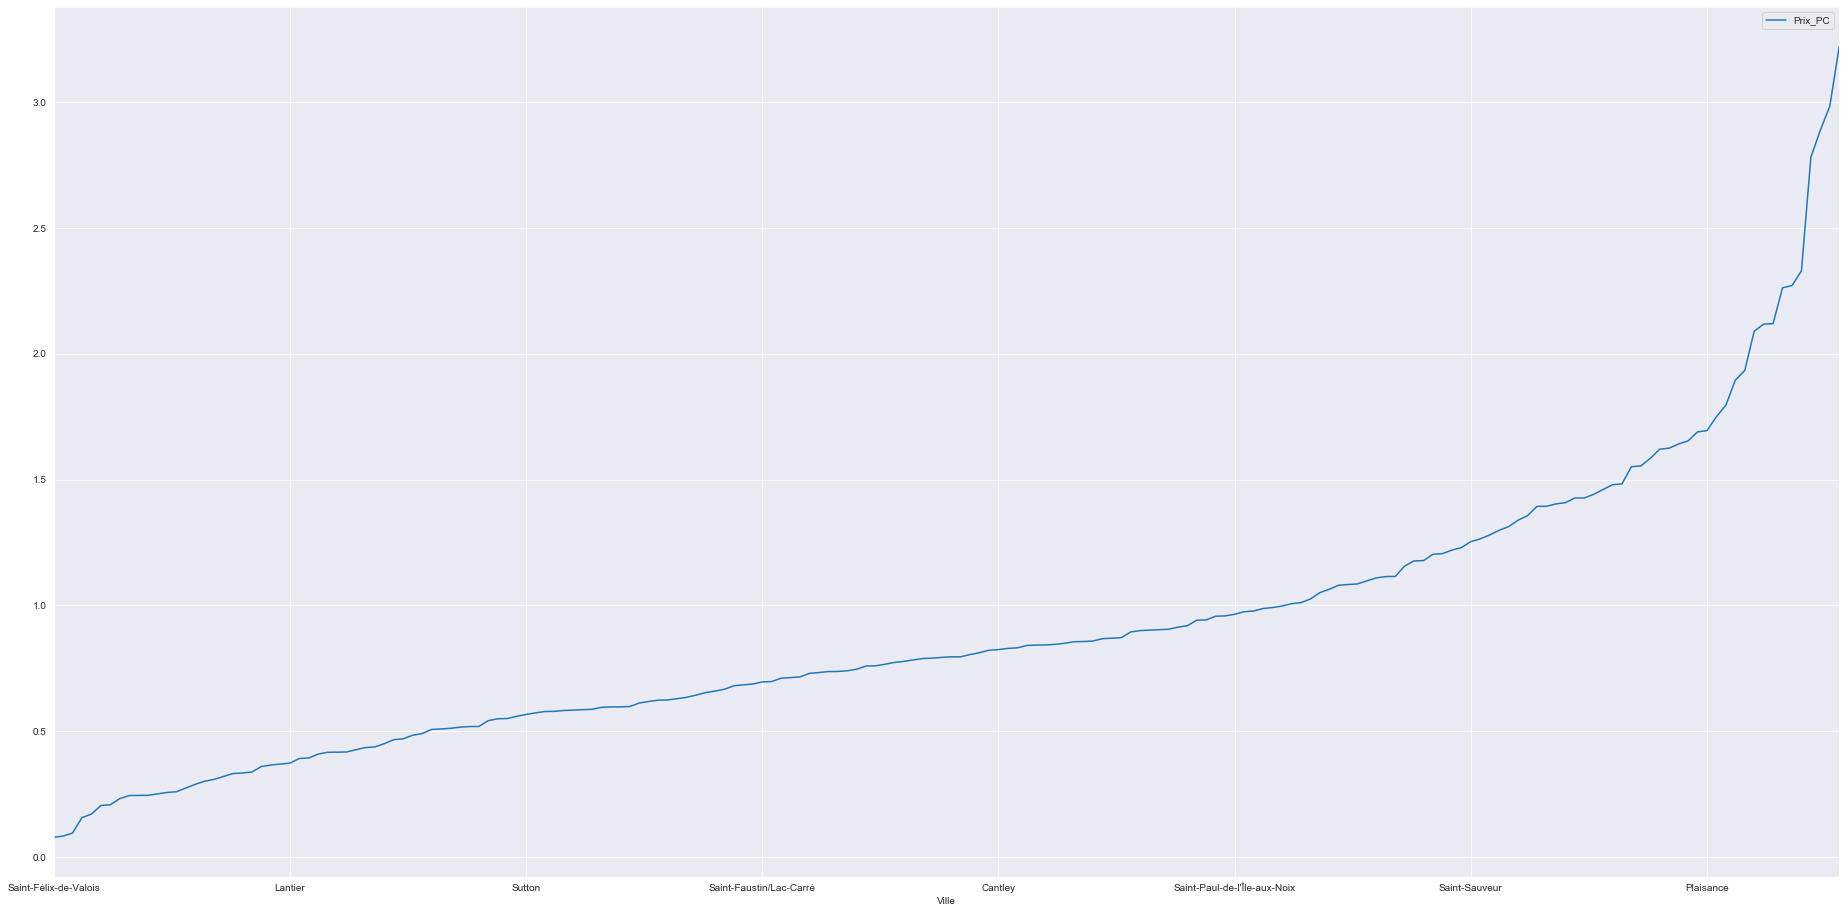

In [217]:
df[['Ville', 'Prix_PC']].groupby(['Ville']).mean().sort_values('Prix_PC').plot()

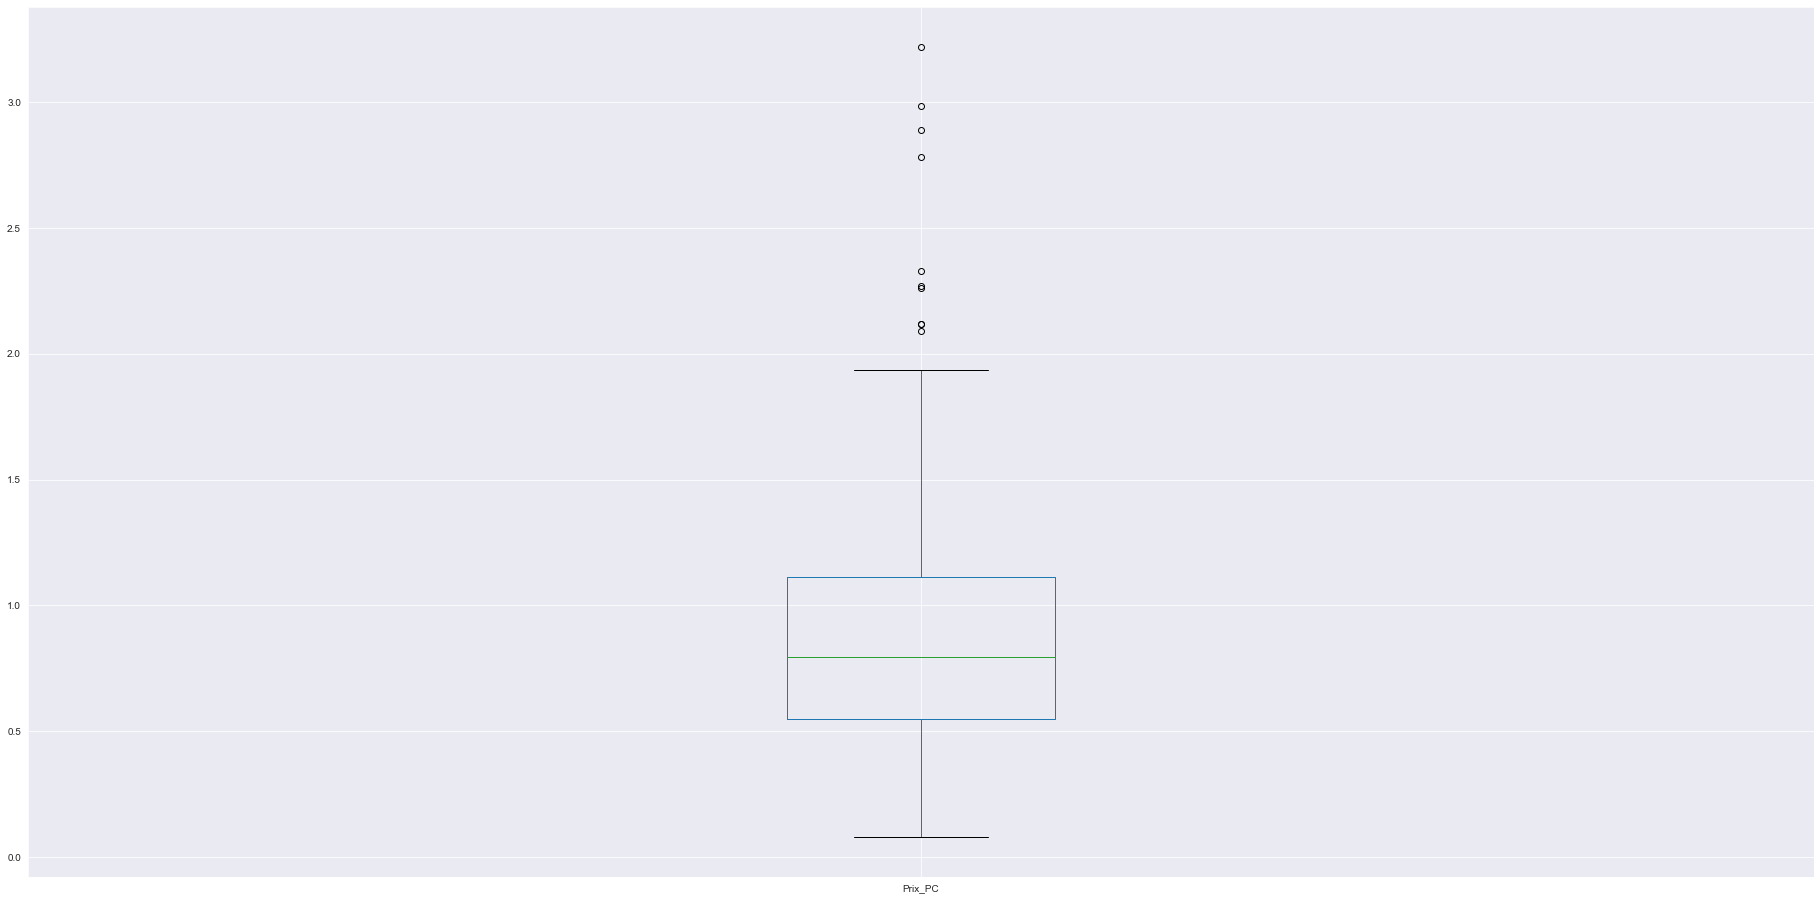

In [218]:
df[['Ville', 'Prix_PC']].groupby(['Ville']).mean().boxplot()